## 1. Install Beberapa Library Terlebih Dahulu

In [248]:
# Install library nltk (natural language tool-kit)
#!pip install nltk

In [249]:
# Install library WordCloud. Library ini untuk membuat visualisasi kumpulan-kumpulan teks
#!pip install WordCloud

In [250]:
"""
Install library regex. Library ini bertujuan untuk mengubah bentuk
string dan bisa menghilangkan/membersihkan teks dari simbol-simbol, emoticon, dll
"""
#!pip install regex

'\nInstall library regex. Library ini bertujuan untuk mengubah bentuk\nstring dan bisa menghilangkan/membersihkan teks dari simbol-simbol, emoticon, dll\n'

In [251]:
"""
Install library Sastrawi. 
Library ini bertujuan untuk mengubah kata-kata yang memiliki imbuhan bahasa Indonesia menjadi bentuk dasarnya
"""
#!pip install Sastrawi

'\nInstall library Sastrawi. \nLibrary ini bertujuan untuk mengubah kata-kata yang memiliki imbuhan bahasa Indonesia menjadi bentuk dasarnya\n'

In [252]:
"""
Install library swifter. Library ini berfungsi untuk mempercepat proses stemming
terhadap DataFrame ketika menjalankan pemrosesan secara parallel
"""
#!pip install swifter

'\nInstall library swifter. Library ini berfungsi untuk mempercepat proses stemming\nterhadap DataFrame ketika menjalankan pemrosesan secara parallel\n'

## 2. Import Library dan Eksplorasi Dataset Menggunakan Pandas

In [253]:
# Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import re
import nltk
nltk.download("punkt")
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # (accuracy score = nilai akurasi)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ekapr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [254]:
# Read dataset yang telah dicrawling (diambil) dari media sosial twitter dan menampilkan data sebanyak 17 data teratas
data_hepatitis = pd.read_csv("Data Crawling Hepatitis Akut/Tweet_Hepatitis_with_Label_TextBlob.csv")

data_hepatitis.head(17)

,Waktu Tweet,Username,Tweet,Sentimen
0,2022-06-26 16:16:08,⚕️base anak fk | open dm📩,dok mau tanyaaa kalo misalnya tes hepatitis se...,Neutral
1,2022-06-26 14:02:24,billion store id,terbaik teraman supplement kesehatan kapsul sp...,Positive
2,2022-06-26 12:19:45,lyndsay,ketua dpr puan maharani menyoroti sejumlah hal...,Positive
3,2022-06-26 12:19:42,lyndsay,puan yang menyoroti hepatitis dan berbagai mac...,Neutral
4,2022-06-26 12:17:25,lyndsay,puan menyoroti kasus hepatitis akut anak harga...,Positive
5,2022-06-26 11:20:51,syaza 🇲🇾,ambil ujian darah doktor kata darah semua cant...,Positive
6,2022-06-26 11:17:15,jengkelin say no 🚫💉,vaksin gak pernah salah jadi katakan saja itu ...,Positive
7,2022-06-26 11:08:07,rs pondok indah,sempat ramai beberapa waktu lalu hepatitis mis...,Positive
8,2022-06-26 11:07:32,🦋,mulan hepatitis gunung,Neutral
9,2022-06-26 11:05:22,nawa,byeeee semua bye gue udah stres minggu sama ke...,Neutral


In [255]:
# Melihat ukuran seperti jumlah kolom dan baris dari DataFrame "data_hepatitis"
data_hepatitis.shape

(899, 4)

In [256]:
# Melihat tipe data dari DataFrame "data_hepatitis"
data_hepatitis.dtypes

Waktu Tweet    object
Username       object
Tweet          object
Sentimen       object
dtype: object

In [257]:
# Melihat apakah di dalam DataFrame "data_hepatitis" memiliki missing values/tidak
data_hepatitis.isna()

,Waktu Tweet,Username,Tweet,Sentimen
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
894,False,False,False,False
895,False,False,False,False
896,False,False,False,False
897,False,False,False,False


In [258]:
# Melihat informasi yang terkandung di dalam DataFrame "data_hepatitis"
data_hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Waktu Tweet  899 non-null    object
 1   Username     899 non-null    object
 2   Tweet        899 non-null    object
 3   Sentimen     899 non-null    object
dtypes: object(4)
memory usage: 28.2+ KB


Berdasarkan output dari informasi yang ada di dalam "data_hepatitis" maka dapat diambil beberapa kesimpulan diantaranya adalah sebagai berikut:

1. Jumlah baris yang ada di dalam DataFrame "data_hepatitis" yakni sebanyak 899 data dengan 4 kolom.
2. Setiap kolom yang ada di dalam DataFrame "data_hepatitis" tidak memiliki missing values/nilai kosong.
3. Tipe data yang digunakan pada DataFrame "data_hepatitis" hanya object (string) saja.

In [259]:
"""
Melihat jumlah nilai sekaligus data-data apa saja yang ada 
di dalam kolom "Waktu Tweet", "Username", dan "Sentimen"
"""

print("--------------Jumlah Total Nilai Data Pada Kolom Waktu Tweet--------------")
print(data_hepatitis["Waktu Tweet"].value_counts(), "\n")

print("--------------Jumlah Total Nilai Data Pada Kolom Username--------------")
print(data_hepatitis["Username"].value_counts(), "\n")

print("--------------Jumlah Total Nilai Data Pada Kolom Sentimen--------------")
print(data_hepatitis["Sentimen"].value_counts())

--------------Jumlah Total Nilai Data Pada Kolom Waktu Tweet--------------
2022-06-19 05:55:41    2
2022-06-19 11:42:28    2
2022-06-19 11:42:29    2
2022-06-22 07:20:48    2
2022-06-24 02:05:59    2
                      ..
2022-06-24 02:28:17    1
2022-06-24 02:27:38    1
2022-06-24 02:26:50    1
2022-06-24 02:22:18    1
2022-06-17 01:45:06    1
Name: Waktu Tweet, Length: 894, dtype: int64 

--------------Jumlah Total Nilai Data Pada Kolom Username--------------
anissa billa                           14
yuni marisa                            10
sutansegeh                             10
putri                                  10
luis chaniago                           9
                                       ..
goodman                                 1
epidemiology job openings (epijobs)     1
mune 🌙                                  1
kalla jengking                          1
sunday🌏                                 1
Name: Username, Length: 514, dtype: int64 

--------------Jumlah Tota

Berdasarkan hasil output diatas maka dapat diambil contoh penjelasan dari dua kolom (Username dan Sentimen) yang diantaranya adalah sebagai berikut:


1. Pada kolom "Username", nilai yang sering muncul di dalam DataFrame "data_hepatitis" adalah username yang bernama annisa billa dengan nilai kemunculan sebanyak 14 kali yang kemudian disusul dengan username yang bernama yuni marisa yang memiliki nilai kemunculan sebanyak 10 kali, sedangkan username yang jarang terlihat pada DataFrame "data" adalah goodman, epidemiology job openings (epijobs), mune 🌙, kalla jengking, dan sunday🌏 yang memiliki nilai kemunculan hanya sebanyak satu kali saja dalam meng-tweet topik tentang hepatitis akut.
2. Pada kolom "Sentimen", nilai yang sering muncul di dalam kolom ini yaitu sentimen Positive dengan nilai kemunculan sebanyak 558 kali yang kemudian disusul oleh sentimen Neutral (Netral) sebanyak 243 kali, sedangkan sentimen Negative (Negatif) memiliki total nilai kemunculan sebanyak 98 kali di dalam DataFrame "data_hepatitis".

In [260]:
# Melihat nilai statistik deskriptif dari DataFrame "data_hepatitis" untuk semua kolom
data_hepatitis.describe(include="all")

,Waktu Tweet,Username,Tweet,Sentimen
count,899,899,899,899
unique,894,514,899,3
top,2022-06-19 05:55:41,anissa billa,dok mau tanyaaa kalo misalnya tes hepatitis se...,Positive
freq,2,14,1,558


Berdasarkan hasil diatas dapat diketahui nilai-nilai statistik deskriptif dari keempat kolom pada DataFrame "data_hepatitis". Di samping itu, karena keempat kolom ini bersifat kategorik bukan numerik maka nilai statistik deskriptif yang ditampilkan berbeda daripada nilai statistik deskriptif untuk kolom yang bersifat numerik karena nilai statistik deskriptif untuk kolom yang bersifat numerik adalah mean, std (standard deviasi), quartil 1 (25%), quartil 2/median (50%), quartil 3 (75%), min (minimum), dan max (maximum), sedangkan untuk kolom kategorik memiliki nilai statistik deskriptif yaitu nilai unique, top, dan freq.

Nilai unique merupakan total nilai/data yang berbeda di dalam 1 kolom. Nilai top merupakan nilai yang sering muncul di dalam kolom tersebut. Terakhir adalah nilai freq yang merupakan total nilai pada nilai top. Sebagai contoh nilai top pada kolom "Sentimen" adalah Positive yang memiliki total kemunculan di dalam kolom tersebut sebanyak 558 data. Hal tersebut sama seperti di codingan sebelumnya ketika saya ingin melihat jumlah nilai dari masing-masing kolom di dalam DataFrame "data_hepatitis". Berikut adalah penjelasan untuk masing-masing nilai statistik deskriptif dari kolom Waktu Tweet, Username, dan Sentimen berdasarkan hasil statistik deskriptif diatas:


1. Pada kolom "Waktu Tweet" memiliki nilai unique berjumlah 894 dengan nilai top/nilai yang sering terlihat adalah 2022-06-19 05:55:41 dengan nilai freq atau nilai kemunculan sebanyak 2 kali.
2. Kolom "Username" memiliki nilai top adalah anissa billa dengan jumlah nilai kemunculan sebanyak 14 kali. Selain itu, kolom "Username" memiliki 514 nilai data yang berbeda-beda.
3. Terakhir adalah kolom "Sentimen" yang memiliki nilai unique hanya 3 saja dan dari ketiga nilai tersebut terdapat nilai top/nilai yang sering muncul di dalam kolom "Sentimen" adalah sentimen Positive yang memiliki total nilai kemunculan (nilai freq) sebanyak 558 kali.

## 3. Text Preprocessing

### 3.1. Cleansing Text

Text preprocessing pertama yang saya lakukan yaitu membersihkan isi tweet yang memiliki simbol-simbol seperti !”#$%&’()*+,-./:;<=>?@[]^_`{|}~]

In [261]:
"""
Menghilangkan huruf-huruf yang tidak sesuai, simbol-simbol, dan emoticon yang tidak dibutuhkan 
di dalam kolom "Username" dan "Tweet" dan menampilkan data sebanyak 15 data teratas
"""
def cleansing_text(text):
    text = re.sub(r"[^a-zA-z0-9]", " ", str(text))
    text = re.sub(r"\b\w{1,2}\b", "", text)
    text = re.sub(r"\s\s+", " ", text)
    text = re.sub(r"https?:\/\/\S+", "", text)  
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)
    return text

data_hepatitis["Username"] = data_hepatitis["Username"].apply(cleansing_text)
data_hepatitis["Tweet"] = data_hepatitis["Tweet"].apply(cleansing_text)

data_hepatitis.head(15)

,Waktu Tweet,Username,Tweet,Sentimen
0,2022-06-26 16:16:08,base anak open,dok mau tanyaaa kalo misalnya tes hepatitis se...,Neutral
1,2022-06-26 14:02:24,billion store,terbaik teraman supplement kesehatan kapsul sp...,Positive
2,2022-06-26 12:19:45,lyndsay,ketua dpr puan maharani menyoroti sejumlah hal...,Positive
3,2022-06-26 12:19:42,lyndsay,puan yang menyoroti hepatitis dan berbagai mac...,Neutral
4,2022-06-26 12:17:25,lyndsay,puan menyoroti kasus hepatitis akut anak harga...,Positive
5,2022-06-26 11:20:51,syaza,ambil ujian darah doktor kata darah semua cant...,Positive
6,2022-06-26 11:17:15,jengkelin say,vaksin gak pernah salah jadi katakan saja itu ...,Positive
7,2022-06-26 11:08:07,pondok indah,sempat ramai beberapa waktu lalu hepatitis mis...,Positive
8,2022-06-26 11:07:32,,mulan hepatitis gunung,Neutral
9,2022-06-26 11:05:22,nawa,byeeee semua bye gue udah stres minggu sama ke...,Neutral


Setelah melakukan proses pembersihan tweet terhadap simbol-simbol atau karakter-karakter yang tidak dipentingkan, langkah selanjutnya adalah case folding. Case folding merupakan sebuah tahapan untuk mengubah huruf-huruf kapital menjadi huruf-huruf kecil seperti dari huruf "A - Z" menjadi "a - z".

### 3.2. Case Folding

In [262]:
# Mengubah ukuran setiap kalimat yang ada di kolom "Tweet" menjadi huruf kecil dan menampilkan data sebanyak 7 data terbawah
data_hepatitis["Tweet Case Folding"] = data_hepatitis["Tweet"].str.lower()

data_hepatitis.tail(7)

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding
892,2022-06-17 02:14:14,hermionne,ikn sejahterakan negeri waspada disinformasi d...,Neutral,ikn sejahterakan negeri waspada disinformasi d...
893,2022-06-17 02:12:54,anisa cenceni,disinformasi vaksin mrna menyebabkan hepatiti...,Neutral,disinformasi vaksin mrna menyebabkan hepatiti...
894,2022-06-17 02:12:14,suparman,tidak benar jika vaksin menyebabkan hepatitis ...,Negative,tidak benar jika vaksin menyebabkan hepatitis ...
895,2022-06-17 02:09:13,snow white,vaksin astrazeneca bukan pemicu hepatitis akut...,Positive,vaksin astrazeneca bukan pemicu hepatitis akut...
896,2022-06-17 02:03:05,dindu nuffin,kandungan adenovirus pada vaksin covid bukan p...,Neutral,kandungan adenovirus pada vaksin covid bukan p...
897,2022-06-17 02:00:00,duah menaria,vaksin covid anak aman waspada provokasi kelom...,Positive,vaksin covid anak aman waspada provokasi kelom...
898,2022-06-17 01:45:06,sunday,sini konten nct datang aja barengan gue gak ta...,Positive,sini konten nct datang aja barengan gue gak ta...


Setelah melakukan proses case folding, langkah selanjutnya adalah tokenizing/tokenisasi. Tahap tokenizing merupakan tahap pemotongan teks ke dalam satuan kata atau bisa dikatakan memotong susunan kalimat menjadi kata per kata atau potongan-potongan kata yang akan dianalisis.

### 3.3. Tokenizing

In [263]:
"""
Melakukan tahap tokenizing atau tokenisasi. Tokenizing merupakan tahapan text preprocessing 
yang digunakan untuk memecah atau memotong susunan kalimat menjadi kata per kata dari kolom Tweet Case Folding
dan menampilkan data sebanyak 8 data teratas
"""
def tokenizing(text):
    return word_tokenize(text)

data_hepatitis["Tweet Tokenizing"] = data_hepatitis["Tweet Case Folding"].apply(tokenizing)
data_hepatitis.head(8)

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding,Tweet Tokenizing
0,2022-06-26 16:16:08,base anak open,dok mau tanyaaa kalo misalnya tes hepatitis se...,Neutral,dok mau tanyaaa kalo misalnya tes hepatitis se...,"[dok, mau, tanyaaa, kalo, misalnya, tes, hepat..."
1,2022-06-26 14:02:24,billion store,terbaik teraman supplement kesehatan kapsul sp...,Positive,terbaik teraman supplement kesehatan kapsul sp...,"[terbaik, teraman, supplement, kesehatan, kaps..."
2,2022-06-26 12:19:45,lyndsay,ketua dpr puan maharani menyoroti sejumlah hal...,Positive,ketua dpr puan maharani menyoroti sejumlah hal...,"[ketua, dpr, puan, maharani, menyoroti, sejuml..."
3,2022-06-26 12:19:42,lyndsay,puan yang menyoroti hepatitis dan berbagai mac...,Neutral,puan yang menyoroti hepatitis dan berbagai mac...,"[puan, yang, menyoroti, hepatitis, dan, berbag..."
4,2022-06-26 12:17:25,lyndsay,puan menyoroti kasus hepatitis akut anak harga...,Positive,puan menyoroti kasus hepatitis akut anak harga...,"[puan, menyoroti, kasus, hepatitis, akut, anak..."
5,2022-06-26 11:20:51,syaza,ambil ujian darah doktor kata darah semua cant...,Positive,ambil ujian darah doktor kata darah semua cant...,"[ambil, ujian, darah, doktor, kata, darah, sem..."
6,2022-06-26 11:17:15,jengkelin say,vaksin gak pernah salah jadi katakan saja itu ...,Positive,vaksin gak pernah salah jadi katakan saja itu ...,"[vaksin, gak, pernah, salah, jadi, katakan, sa..."
7,2022-06-26 11:08:07,pondok indah,sempat ramai beberapa waktu lalu hepatitis mis...,Positive,sempat ramai beberapa waktu lalu hepatitis mis...,"[sempat, ramai, beberapa, waktu, lalu, hepatit..."


Setelah melakukan tahapan tokenisasi (tokenizing), selanjutnya saya akan melakukan proses filtering (stowords). Proses stopwords ini merupakan tahapan pengambilan kata-kata dari tahapan tokenisasi. Stopword merupakan sebuah tahapan yang dimana bertujuan untuk membuang kata-kata yang tidak deskriptif dalam melakukan pendekatan bag-of-words.

Kata-kata yang termasuk ke dalam list stopwords Bahasa Indonesia adalah sebagai berikut:

"yang", "untuk", "pada", "ke", "para", "namun", "menurut", "antara", "dia", "dua", "ia", "seperti", "jika", "jika", "sehingga", "kembali", "dan", "tidak", "ini", "karena", "kepada", "oleh", "saat", "harus", "sementara", "setelah", "belum", "kami", "sekitar", "bagi", "serta", "di", "dari", "telah", "sebagai", "masih", "hal", "ketika", "adalah", "itu", "dalam", "bisa", "bahwa", "atau", "hanya", "kita", "dengan", "akan", "juga", "ada", "mereka", "sudah", "saya", "terhadap", "secara", "agar", "lain", "anda", "begitu", "mengapa", "kenapa", "yaitu", "yakni", "daripada", "itulah", "lagi", "maka", "tentang", "demi", "dimana", "kemana", "pula", "sambil", "sebelum", "sesudah", "supaya", "guna", "kah", "pun", "sampai", "sedangkan", "selagi", "sementara", "tetapi", "apakah", "kecuali", "sebab", "selain", "seolah", "seraya", "seterusnya", "tanpa", "agak", "boleh", "dapat", "dsb", "dst", "dll", "dahulu", "dulunya", "anu", "demikian", "tapi", "ingin", "juga", "nggak", "mari", "nanti", "melainkan", "oh", "ok", "seharusnya", "sebetulnya", "setiap", "setidaknya", "sesuatu", "pasti", "saja", "toh", "ya", "walau", "tolong", "tentu", "amat", "apalagi", dan "bagaimanapun".

Kata-kata tersebut dapat dilihat atau diketahui melalui library Sastrawi. Tahapan dari stopwords dapat dilihat pada langkah selanjutnya.

### 3.4. Stopwords

In [264]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

Berdasarkan output diatas dapat diketahui bahwasanya Bahasa Indonesia memiliki banyak sekali kata imbuhan seperti kata "yang", "untuk", "pada", dst. Dalam pengujian natural language processing (NLP) biasanya tidak terlalu membutuhkan kata-kata imbuhan. Maka dari itu sebelum melakukan proses pengklasifikasian dengan model machine learning, terlebih dahulu text yang memiliki kata-kata imbuhan dihapus dari daftar teks.

In [265]:
# Melakukan tahap stopwords yaitu menghapus kata-kata imbuhan dari kolom "Tweet Tokenizing"
from nltk.corpus import stopwords
nltk.download("stopwords")

# Mendeklarasikan kata-kata imbuhan Bahasa Indonesia yang akan dihapus
remove_affixes = ["yang", "untuk", "pada", "ke", "para", "namun", "menurut", "antara", "dia", "dua", "ia",
                  "seperti", "jika", "jika", "sehingga", "kembali", "dan", "tidak", "ini", "karena", "kepada", "oleh",
                  "saat", "harus", "sementara", "setelah", "belum", "kami", "sekitar", "bagi", "serta", "di", "dari", "telah",
                  "sebagai", "masih", "hal", "ketika", "adalah", "itu", "dalam", "bisa", "bahwa", "atau", "hanya", "kita",
                  "dengan", "akan", "juga", "ada", "mereka", "sudah", "saya", "terhadap", "secara", "agar", "lain", "anda",
                  "begitu", "mengapa", "kenapa", "yaitu", "yakni", "daripada", "itulah", "lagi", "maka", "tentang", "demi",
                  "dimana", "kemana", "pula", "sambil", "sebelum", "sesudah", "supaya", "guna", "kah", "pun", "sampai",
                  "sedangkan", "selagi", "sementara", "tetapi", "apakah", "kecuali", "sebab", "selain", "seolah", "seraya",
                  "seterusnya", "tanpa", "agak", "boleh", "dapat", "dsb", "dst", "dll", "dahulu", "dulunya", "anu", "demikian",
                  "tapi", "ingin", "juga", "nggak", "mari", "nanti", "melainkan", "oh", "ok", "seharusnya", "sebetulnya",
                  "setiap", "setidaknya", "sesuatu", "pasti", "saja", "toh", "ya", "walau", "tolong", "tentu", "amat",
                  "apalagi", "bagaimanapun"]

list_stopwords = stopwords.words("indonesian")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ekapr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [266]:
# Mendeklarasikan fungsi untuk list_stopwords untuk Bahasa Indonesia
def list_stopwords_text(text):
    return [word for word in text if word not in list_stopwords]

data_hepatitis["Tweet Stopwords"] = data_hepatitis["Tweet Tokenizing"].apply(list_stopwords_text)

In [267]:
"""
Mendeklarasikan fungsi untuk untuk menghapus kata-kata yang ada 
di dalam list (list_delete). List_delete menampung kata-kata imbuhan yang telah didefisinikan
untuk dihapus dari daftar teks dan menampilkan data sebanyak 8 data terbawah
"""
def stopwords_text(text):
    return [word for word in text if word not in remove_affixes]

data_hepatitis["Tweet Stopwords"] = data_hepatitis["Tweet Stopwords"].apply(stopwords_text)
data_hepatitis.tail(8)

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding,Tweet Tokenizing,Tweet Stopwords
891,2022-06-17 02:16:51,ujang frusciante,ikn sejahterakan negeri waspada informasi hoax...,Neutral,ikn sejahterakan negeri waspada informasi hoax...,"[ikn, sejahterakan, negeri, waspada, informasi...","[ikn, sejahterakan, negeri, waspada, informasi..."
892,2022-06-17 02:14:14,hermionne,ikn sejahterakan negeri waspada disinformasi d...,Neutral,ikn sejahterakan negeri waspada disinformasi d...,"[ikn, sejahterakan, negeri, waspada, disinform...","[ikn, sejahterakan, negeri, waspada, disinform..."
893,2022-06-17 02:12:54,anisa cenceni,disinformasi vaksin mrna menyebabkan hepatiti...,Neutral,disinformasi vaksin mrna menyebabkan hepatiti...,"[disinformasi, vaksin, mrna, menyebabkan, hepa...","[disinformasi, vaksin, mrna, menyebabkan, hepa..."
894,2022-06-17 02:12:14,suparman,tidak benar jika vaksin menyebabkan hepatitis ...,Negative,tidak benar jika vaksin menyebabkan hepatitis ...,"[tidak, benar, jika, vaksin, menyebabkan, hepa...","[vaksin, menyebabkan, hepatitis, anak, vaksina..."
895,2022-06-17 02:09:13,snow white,vaksin astrazeneca bukan pemicu hepatitis akut...,Positive,vaksin astrazeneca bukan pemicu hepatitis akut...,"[vaksin, astrazeneca, bukan, pemicu, hepatitis...","[vaksin, astrazeneca, pemicu, hepatitis, akut,..."
896,2022-06-17 02:03:05,dindu nuffin,kandungan adenovirus pada vaksin covid bukan p...,Neutral,kandungan adenovirus pada vaksin covid bukan p...,"[kandungan, adenovirus, pada, vaksin, covid, b...","[kandungan, adenovirus, vaksin, covid, penyeba..."
897,2022-06-17 02:00:00,duah menaria,vaksin covid anak aman waspada provokasi kelom...,Positive,vaksin covid anak aman waspada provokasi kelom...,"[vaksin, covid, anak, aman, waspada, provokasi...","[vaksin, covid, anak, aman, waspada, provokasi..."
898,2022-06-17 01:45:06,sunday,sini konten nct datang aja barengan gue gak ta...,Positive,sini konten nct datang aja barengan gue gak ta...,"[sini, konten, nct, datang, aja, barengan, gue...","[konten, nct, aja, barengan, gue, gak, takutt,..."


Tahapan selanjutnya dalam text processing adalah proses normalisasi. Teknik normalisasi merupakan sebuah tahapan kegiatan text preprocessing untuk mengubah kata-kata yang tidak baku atau kata yang ditulis dengan bahasa "gaul" atau bahasa sehari-hari menjadi kata baku.

### 3.5. Normalisasi

In [268]:
"""
Melakukan perubahan kalimat dasar dari bahasa selain bahasa indonesia menjadi
bahasa indonesia yang baku dengan proses normalisasi. Teknik normalisasi merupakan sebuah teknik untuk mengubah
kata-kata "gaul" atau kata-kata yang tidak baku menjadi sebuah kata yang tepat dan menampilkan data sebanyak 19 data terbawah
"""
normalize_words = {"tanyaaa": "tanya",
                   "kenapaa": "kenapa",
                   "suplemenkesehatan": "suplemen kesehatan",
                   "obatherbal": "obat herbal",
                   "cholestrol": "kolesterol",
                   "aware": "peduli",
                   "byeeee": "bye",
                   "magh": "maag",
                   "mmg": "memang",
                   "anak2": "anak-anak",
                   "rilissehat": "rilis sehat",
                   "pelayana": "pelayanan",
                   "gaada": "tidak ada",
                   "atlit2":"atlit-atlit",
                   "kalo": "kalau",
                   "kaitanny": "kaitannya",
                   "sampe": "sampe",
                   "indonesiawaspada": "indonesia waspada",
                   "yaaaa": "ya", 
                   "indonesiawaspada": "indonesia waspada",
                   "antijamur": "anti jamur",
                   "lu": "lu",
                   "bbrp": "beberapa",
                   "lengkapivaksinperketatprokes": "lengkapi vaksin perketat prokes",
                   "antibakteri": "anti bakteri"
                  }

def word_normalization(document):
    return [normalize_words[term] if term in normalize_words else term for term in document]

data_hepatitis["Tweet Normalisasi"] = data_hepatitis["Tweet Stopwords"].apply(word_normalization)
data_hepatitis.tail(19)

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding,Tweet Tokenizing,Tweet Stopwords,Tweet Normalisasi
880,2022-06-17 02:49:29,doli siagian,waspada provokasi kelompok kepentingan yang me...,Positive,waspada provokasi kelompok kepentingan yang me...,"[waspada, provokasi, kelompok, kepentingan, ya...","[waspada, provokasi, kelompok, kepentingan, me...","[waspada, provokasi, kelompok, kepentingan, me..."
881,2022-06-17 02:48:55,ayam jago,penyebab munculnya hepatitis misterius bukan ...,Neutral,penyebab munculnya hepatitis misterius bukan ...,"[penyebab, munculnya, hepatitis, misterius, bu...","[penyebab, munculnya, hepatitis, misterius, va...","[penyebab, munculnya, hepatitis, misterius, va..."
882,2022-06-17 02:47:29,nadya rahmaaa,vaksinasi covid tidak menyebabkan kasus hepati...,Positive,vaksinasi covid tidak menyebabkan kasus hepati...,"[vaksinasi, covid, tidak, menyebabkan, kasus, ...","[vaksinasi, covid, menyebabkan, hepatitis, aku...","[vaksinasi, covid, menyebabkan, hepatitis, aku..."
883,2022-06-17 02:47:18,erie,waspada hoax vaksinasi covid tak terkait denga...,Positive,waspada hoax vaksinasi covid tak terkait denga...,"[waspada, hoax, vaksinasi, covid, tak, terkait...","[waspada, hoax, vaksinasi, covid, terkait, hep...","[waspada, hoax, vaksinasi, covid, terkait, hep..."
884,2022-06-17 02:45:22,kelurahan garuda,giat seklur garuda mengikuti kegiatan sosialis...,Positive,giat seklur garuda mengikuti kegiatan sosialis...,"[giat, seklur, garuda, mengikuti, kegiatan, so...","[giat, seklur, garuda, mengikuti, kegiatan, so...","[giat, seklur, garuda, mengikuti, kegiatan, so..."
885,2022-06-17 02:42:00,lalalanina55,adenovirus vaksin astrazeneca picu hepatitis a...,Positive,adenovirus vaksin astrazeneca picu hepatitis a...,"[adenovirus, vaksin, astrazeneca, picu, hepati...","[adenovirus, vaksin, astrazeneca, picu, hepati...","[adenovirus, vaksin, astrazeneca, picu, hepati..."
886,2022-06-17 02:41:45,narasi indonesia,vaksinasi covid tidak sebabkan hepatitis akut ...,Positive,vaksinasi covid tidak sebabkan hepatitis akut ...,"[vaksinasi, covid, tidak, sebabkan, hepatitis,...","[vaksinasi, covid, sebabkan, hepatitis, akut, ...","[vaksinasi, covid, sebabkan, hepatitis, akut, ..."
887,2022-06-17 02:30:37,humas polreslahat,maraknya penyakit hepatitis yang menyerang ana...,Positive,maraknya penyakit hepatitis yang menyerang ana...,"[maraknya, penyakit, hepatitis, yang, menyeran...","[maraknya, penyakit, hepatitis, menyerang, ana...","[maraknya, penyakit, hepatitis, menyerang, ana..."
888,2022-06-17 02:25:25,amoi kurau,waspada hoax tidak ada korelasi antara hepatit...,Neutral,waspada hoax tidak ada korelasi antara hepatit...,"[waspada, hoax, tidak, ada, korelasi, antara, ...","[waspada, hoax, korelasi, hepatitis, vaksin, k...","[waspada, hoax, korelasi, hepatitis, vaksin, k..."
889,2022-06-17 02:20:10,elina azkia,awas hoax adenovirus divaksinasi astrazeneca b...,Positive,awas hoax adenovirus divaksinasi astrazeneca b...,"[awas, hoax, adenovirus, divaksinasi, astrazen...","[awas, hoax, adenovirus, divaksinasi, astrazen...","[awas, hoax, adenovirus, divaksinasi, astrazen..."


Tahapan terakhir dalam text processing adalah proses stemming. Teknik stemming merupakan sebuah tahapan kegiatan text preprocessing untuk membentuk sebuah kata baru dengan menambahkan kata imbuhan terhadap suatu kata yang tidak mengubah kelas kata tersebut. Teknik stemming juga dapat dikatakan sebagai teknik yang mengelompokkan kata-kata lain yang memiliki kata dasar dan arti yang serupa namun memiliki bentuk yang berbeda karena mendapatkan imbuhan yang berbeda pula.

### 3.6. Stemming

In [269]:
# Proses Stemming dibantu dengan bantuan swifter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# Membuat Stemmer dari sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat fungsi stemming
def stemming(text):
    return stemmer.stem(text)

term_dict = {}

# Menghitung ada berapa kata/words di dalam kolom "Tweet Normalisasi"
for document in data_hepatitis["Tweet Normalisasi"]:
    for text in document:
        if text not in term_dict:
            term_dict[text] = " "
            
print(len(term_dict))
print("------------------------")

# Menampilkan isi kata/words yang telah dilakukan proses stemming
for text in term_dict:
    term_dict[text] = stemming(text)
    print(text,":" ,term_dict[text])
    
print(term_dict)
print("------------------------")

# Membuat fungsi baru untuk proses stemming
def stemming_words(document):
    return [term_dict[text] for text in document]

data_hepatitis["Tweet Stemming"] = data_hepatitis["Tweet Normalisasi"].swifter.apply(stemming_words)

2136
------------------------
dok : dok
tanya : tanya
kalau : kalau
tes : tes
hepatitis : hepatitis
sgot : sgot
sgpt : sgpt
ningkat : ningkat
kenapa : kenapa
terbaik : baik
teraman : ram
supplement : supplement
kesehatan : sehat
kapsul : kapsul
spirulina : spirulina
kolesterol : kolesterol
diabetes : diabetes
jantung : jantung
kapsulspirulina : kapsulspirulina
herbalspirulina : herbalspirulina
obat herbal : obat herbal
suplemen kesehatan : suplemen sehat
ketua : ketua
dpr : dpr
puan : puan
maharani : maharani
menyoroti : sorot
perhatian : perhati
khusus : khusus
sidang : sidang
kali : kali
akut : akut
anak : anak
masyarakat : masyarakat
membuktikan : bukti
betapa : betapa
pedulinya : peduli
permasalahan : masalah
tanah : tanah
air : air
harga : harga
pangan : pangan
lebaran : lebaran
pemulihan : pulih
ekonomi : ekonomi
pandemi : pandemi
covid : covid
mereda : reda
ambil : ambil
ujian : uji
darah : darah
doktor : doktor
cantik : cantik
okay : okay
hiv : hiv
negative : negative
lepas : l

dampat : dampat
terprovokasi : provokasi
berita : berita
mata : mata
turun : turun
namanya : nama
pengaruh : pengaruh
leres : les
teu : teu
aya : aya
nyababkeun : nyababkeun
patitis : patitis
geneva : geneva
kes : kes
berkemungkinan : mungkin
teruk : teruk
kanak : kanak
setakat : takat
bener : bener
ora : ora
ana : ana
sing : sing
nyebabake : nyebabake
cerdas : cerdas
menanggapi : tanggap
isu : isu
true : true
there : there
vaccine : vaccine
that : that
causes : causes
bohong : bohong
zaneka : zaneka
korelasi : korelasi
eropa : eropa
menyumbang : sumbang
267 : 267
inggris : inggris
jabar : jabar
wabah : wabah
menulari : tular
ratusan : ratus
sayangnya : sayang
akun : akun
media : media
sosial : sosial
memuat : muat
klaim : klaim
menuduh : tuduh
diduga : duga
pemicunya : picu
diimbau : imbau
jaga : jaga
siasatan : siasat
kajian : kaji
jawapan : jawapan
punca : punca
berlaku : laku
asbab : asbab
peningkatan : tingkat
kanak2 : kanak2
kumulatif : kumulatif
juni : juni
bhdunia : bhdunia
dik

gatau : gatau
konsul : konsul
ngga : ngga
kontak : kontak
dinkes : dinkes
gencar : gencar
sosialisasikan : sosialisasi
bahaya : bahaya
ajakin : ajakin
senior : senior
cuman : cuman
sayang : sayang
riwayat : riwayat
ortu : ortu
alhamdullilah : alhamdullilah
ayah : ayah
terselamatkan : selamat
mcu : mcu
kemaren : kemaren
reaktif : reaktif
banget : banget
abis : abis
sakitan : sakit
dusun : dusun
bgt : bgt
dpt : dpt
hib : hib
ipv : ipv
campak : campak
nek : nek
wes : wes
keno : keno
koe : koe
biso : biso
nge : nge
tweet : tweet
ngene : ngene
meneh : teh
wibungitis : wibungitis
jenis : jenis
goblog : goblog
wkwk : wkwk
amit : amit
measles : measles
mandi : mandi
dlu : dlu
trus : trus
bersih2 : bersih2
deh : deh
tangan : tangan
mainin : mainin
titit : titit
tiati : tiati
wkk : wkk
lumayan : lumayan
mudahan : mudah
penyerahan : serah
btw : btw
terdiagnosa : terdiagnosa
otomatis : otomatis
peran : peran
edukasi : edukasi
karna : karna
tau : tau
kedepannya : depan
terjangkit : jangkit
tubuh : 

penanggulanan : penanggulanan
kab : kab
dibidangi : bidang
bidang : bidang
p2p : p2p
kelas : kelas
gegara : gegara
unggulan : unggul
poin : poin
rank : rank
tenang : tenang
divaksinnya : vaksin
setahun : tahun
beh : beh
nenek : nenek
gara2 : gara2
1944 : 1944
framingnya : framingnya
jelek : jelek
patahin : patahin
wlopun : wlopun
dipake : dipake
nyuci : nyuci
skt : skt
pake : pake
rambut : rambut
terang : terang
ya : ya
basically : basically
bule : bule
undertonenya : undertonenya
cool : cool
wkwkwkwkwk : wkwkwkwkwk
jht : jht
medapat : medapat
srngan : srngan
remaja : remaja
sekarat : sekarat
dlm : dlm
tidur : tidur
atlet : atlet
berolah : olah
raga : raga
kelumpuhan : lumpuh
wajah : wajah
solusi : solusi
tersedia : sedia
adl : adl
melanjutkan : lanjut
perluasan : luas
aktivitas : aktivitas
biologis : biologis
ukraina : ukraina
2017 : 2017
didanai : dana
dtra : dtra
black : black
veatch : veatch
analisis : analisis
tularemia : tularemia
slide : slide
rusia : rusia
kesepakatan : sepakat

2021 : 2021
mendadak : dadak
macam2 : macam2
sads : sads
scd : scd
prediktor : prediktor
berbasis : bas
teguh : teguh
bersandar : sandar
quran : quran
meramal : ramal
tambahn : tambahn
teratur : atur
istirahat : istirahat
lembur : lembur
nongki : nongki
stress : stress
tampi : tampi
disna : disna
ekg : ekg
tensi : tensi
rotgen : rotgen
hasilny : hasilny
bagus : bagus
knp : knp
7kg : 7kg
scepat : scepat
you : you
know : know
reason : reason
why : why
never : never
story : story
behind : behind
jawabannya : jawab
point : point
tambahin : tambahin
itseokjinkim : itseokjinkim
ganteng : ganteng
kanser : kanser
utama : utama
seawal : awal
elakkan : elak
kelak : kelak
kpd : kpd
kerana : rana
melawan : lawan
lho : lho
setau : tau
maaf : maaf
belajar : ajar
klw : klw
doang : doang
resep : resep
skrg : skrg
tequilla : tequilla
grgr : grgr
hook : hook
stranger : stranger
anjing : anjing
majalah : majalah
family : family
vol : vol
hadir : hadir
hdi : hdi
one : one
menyajikan : saji
artikel : artik

Pandas Apply:   0%|          | 0/899 [00:00<?, ?it/s]

In [270]:
# Menampilkan data sebanyak 19 data teratas dari DataFrame "data_hepatitis"
data_hepatitis.head(19)

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding,Tweet Tokenizing,Tweet Stopwords,Tweet Normalisasi,Tweet Stemming
0,2022-06-26 16:16:08,base anak open,dok mau tanyaaa kalo misalnya tes hepatitis se...,Neutral,dok mau tanyaaa kalo misalnya tes hepatitis se...,"[dok, mau, tanyaaa, kalo, misalnya, tes, hepat...","[dok, tanyaaa, kalo, tes, hepatitis, sgot, sgp...","[dok, tanya, kalau, tes, hepatitis, sgot, sgpt...","[dok, tanya, kalau, tes, hepatitis, sgot, sgpt..."
1,2022-06-26 14:02:24,billion store,terbaik teraman supplement kesehatan kapsul sp...,Positive,terbaik teraman supplement kesehatan kapsul sp...,"[terbaik, teraman, supplement, kesehatan, kaps...","[terbaik, teraman, supplement, kesehatan, kaps...","[terbaik, teraman, supplement, kesehatan, kaps...","[baik, ram, supplement, sehat, kapsul, spiruli..."
2,2022-06-26 12:19:45,lyndsay,ketua dpr puan maharani menyoroti sejumlah hal...,Positive,ketua dpr puan maharani menyoroti sejumlah hal...,"[ketua, dpr, puan, maharani, menyoroti, sejuml...","[ketua, dpr, puan, maharani, menyoroti, perhat...","[ketua, dpr, puan, maharani, menyoroti, perhat...","[ketua, dpr, puan, maharani, sorot, perhati, k..."
3,2022-06-26 12:19:42,lyndsay,puan yang menyoroti hepatitis dan berbagai mac...,Neutral,puan yang menyoroti hepatitis dan berbagai mac...,"[puan, yang, menyoroti, hepatitis, dan, berbag...","[puan, menyoroti, hepatitis, masyarakat, membu...","[puan, menyoroti, hepatitis, masyarakat, membu...","[puan, sorot, hepatitis, masyarakat, bukti, be..."
4,2022-06-26 12:17:25,lyndsay,puan menyoroti kasus hepatitis akut anak harga...,Positive,puan menyoroti kasus hepatitis akut anak harga...,"[puan, menyoroti, kasus, hepatitis, akut, anak...","[puan, menyoroti, hepatitis, akut, anak, harga...","[puan, menyoroti, hepatitis, akut, anak, harga...","[puan, sorot, hepatitis, akut, anak, harga, pa..."
5,2022-06-26 11:20:51,syaza,ambil ujian darah doktor kata darah semua cant...,Positive,ambil ujian darah doktor kata darah semua cant...,"[ambil, ujian, darah, doktor, kata, darah, sem...","[ambil, ujian, darah, doktor, darah, cantik, c...","[ambil, ujian, darah, doktor, darah, cantik, k...","[ambil, uji, darah, doktor, darah, cantik, kol..."
6,2022-06-26 11:17:15,jengkelin say,vaksin gak pernah salah jadi katakan saja itu ...,Positive,vaksin gak pernah salah jadi katakan saja itu ...,"[vaksin, gak, pernah, salah, jadi, katakan, sa...","[vaksin, gak, salah, misterius, rakyatmelawanm...","[vaksin, gak, salah, misterius, rakyatmelawanm...","[vaksin, gak, salah, misterius, rakyatmelawanm..."
7,2022-06-26 11:08:07,pondok indah,sempat ramai beberapa waktu lalu hepatitis mis...,Positive,sempat ramai beberapa waktu lalu hepatitis mis...,"[sempat, ramai, beberapa, waktu, lalu, hepatit...","[ramai, hepatitis, misterius, penyebabnya, bia...","[ramai, hepatitis, misterius, penyebabnya, bia...","[ramai, hepatitis, misterius, sebab, biar, ped..."
8,2022-06-26 11:07:32,,mulan hepatitis gunung,Neutral,mulan hepatitis gunung,"[mulan, hepatitis, gunung]","[mulan, hepatitis, gunung]","[mulan, hepatitis, gunung]","[mulan, hepatitis, gunung]"
9,2022-06-26 11:05:22,nawa,byeeee semua bye gue udah stres minggu sama ke...,Neutral,byeeee semua bye gue udah stres minggu sama ke...,"[byeeee, semua, bye, gue, udah, stres, minggu,...","[byeeee, bye, gue, udah, stres, minggu, kertas...","[bye, bye, gue, udah, stres, minggu, kertas, k...","[bye, bye, gue, udah, stres, minggu, kertas, k..."


In [271]:
"""
Membuat kolom yang bernama "Teks Bersih" pada DataFrame "data_hepatitis" yang telah selesai dilakukan proses text preprocessing.
Kolom "Teks Bersih" didapatkan dari kolom "Tweet Stemming" dan menghilangkan pembatas ([] dan , pada setiap teksnya)
serta menampilkan data sebanyak 4 data teratas
"""
data_hepatitis["Tweet Bersih"] = [" ".join(map(str, i)) for i in data_hepatitis["Tweet Stemming"]]
data_hepatitis.head(4)

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding,Tweet Tokenizing,Tweet Stopwords,Tweet Normalisasi,Tweet Stemming,Tweet Bersih
0,2022-06-26 16:16:08,base anak open,dok mau tanyaaa kalo misalnya tes hepatitis se...,Neutral,dok mau tanyaaa kalo misalnya tes hepatitis se...,"[dok, mau, tanyaaa, kalo, misalnya, tes, hepat...","[dok, tanyaaa, kalo, tes, hepatitis, sgot, sgp...","[dok, tanya, kalau, tes, hepatitis, sgot, sgpt...","[dok, tanya, kalau, tes, hepatitis, sgot, sgpt...",dok tanya kalau tes hepatitis sgot sgpt ningka...
1,2022-06-26 14:02:24,billion store,terbaik teraman supplement kesehatan kapsul sp...,Positive,terbaik teraman supplement kesehatan kapsul sp...,"[terbaik, teraman, supplement, kesehatan, kaps...","[terbaik, teraman, supplement, kesehatan, kaps...","[terbaik, teraman, supplement, kesehatan, kaps...","[baik, ram, supplement, sehat, kapsul, spiruli...",baik ram supplement sehat kapsul spirulina kol...
2,2022-06-26 12:19:45,lyndsay,ketua dpr puan maharani menyoroti sejumlah hal...,Positive,ketua dpr puan maharani menyoroti sejumlah hal...,"[ketua, dpr, puan, maharani, menyoroti, sejuml...","[ketua, dpr, puan, maharani, menyoroti, perhat...","[ketua, dpr, puan, maharani, menyoroti, perhat...","[ketua, dpr, puan, maharani, sorot, perhati, k...",ketua dpr puan maharani sorot perhati khusus d...
3,2022-06-26 12:19:42,lyndsay,puan yang menyoroti hepatitis dan berbagai mac...,Neutral,puan yang menyoroti hepatitis dan berbagai mac...,"[puan, yang, menyoroti, hepatitis, dan, berbag...","[puan, menyoroti, hepatitis, masyarakat, membu...","[puan, menyoroti, hepatitis, masyarakat, membu...","[puan, sorot, hepatitis, masyarakat, bukti, be...",puan sorot hepatitis masyarakat bukti betapa p...


### 3.7. Mengeluarkan Isi Tweet dari Kolom "Tweet Bersih" untuk Persiapan Proses Visualisasi Data

In [272]:
# Mengeluarkan isi tweet dari kolom "Tweet Bersih" dari DataFrame "data_hepatitis"
ekstraksi_tweet = " ".join(str(c) for c in data_hepatitis["Tweet Bersih"])
ekstraksi_tweet

'dok tanya kalau tes hepatitis sgot sgpt ningkat kenapa baik ram supplement sehat kapsul spirulina kolesterol diabetes jantung hepatitis kapsulspirulina herbalspirulina obat herbal suplemen sehat ketua dpr puan maharani sorot perhati khusus dpr sidang kali hepatitis akut anak puan sorot hepatitis masyarakat bukti betapa peduli puan masalah tanah air puan sorot hepatitis akut anak harga pangan lebaran pulih ekonomi pandemi covid reda ambil uji darah doktor darah cantik kolesterol okay hepatitis hiv negative lepas nak cari duit extra jual darah vaksin gak salah misterius rakyatmelawanmandatory who lapor 920 hepatitis akut misterius sebar negara klik baca ramai hepatitis misterius sebab biar peduli gejala sakit yuk tonton jelas lengkap prof hinky hindra irawan satar troppaed video mulan hepatitis gunung bye bye gue udah stres minggu kertas kertas jahanam selamat tinggal blok gastrointestinal selamat tinggal lambung teman teman gue bahas maag gerd hepatitis malnutrisi hemoroid appendisitis

In [273]:
"""
Melihat isi tweet per kata yang telah dilakukan proses ekstraksi. Proses untuk melihat isi tweet per kata
menggunakan fungsi word_tokenize dari library nltk
"""
word_tokenize_tweets = word_tokenize(ekstraksi_tweet)
word_tokenize_tweets

['dok',
 'tanya',
 'kalau',
 'tes',
 'hepatitis',
 'sgot',
 'sgpt',
 'ningkat',
 'kenapa',
 'baik',
 'ram',
 'supplement',
 'sehat',
 'kapsul',
 'spirulina',
 'kolesterol',
 'diabetes',
 'jantung',
 'hepatitis',
 'kapsulspirulina',
 'herbalspirulina',
 'obat',
 'herbal',
 'suplemen',
 'sehat',
 'ketua',
 'dpr',
 'puan',
 'maharani',
 'sorot',
 'perhati',
 'khusus',
 'dpr',
 'sidang',
 'kali',
 'hepatitis',
 'akut',
 'anak',
 'puan',
 'sorot',
 'hepatitis',
 'masyarakat',
 'bukti',
 'betapa',
 'peduli',
 'puan',
 'masalah',
 'tanah',
 'air',
 'puan',
 'sorot',
 'hepatitis',
 'akut',
 'anak',
 'harga',
 'pangan',
 'lebaran',
 'pulih',
 'ekonomi',
 'pandemi',
 'covid',
 'reda',
 'ambil',
 'uji',
 'darah',
 'doktor',
 'darah',
 'cantik',
 'kolesterol',
 'okay',
 'hepatitis',
 'hiv',
 'negative',
 'lepas',
 'nak',
 'cari',
 'duit',
 'extra',
 'jual',
 'darah',
 'vaksin',
 'gak',
 'salah',
 'misterius',
 'rakyatmelawanmandatory',
 'who',
 'lapor',
 '920',
 'hepatitis',
 'akut',
 'misterius',

In [274]:
"""
Melakukan proses perhitungan menggunakan probabilitas berdasarkan total kemunculan kata per kata
menggunakan fungsi FreqDist dari library nltk
"""
from nltk.probability import FreqDist
fqdist_tweets = FreqDist(word_tokenize_tweets)
fqdist_tweets

FreqDist({'hepatitis': 937, 'vaksin': 488, 'akut': 423, 'covid': 300, 'sebab': 263, 'anak': 252, 'kait': 231, 'indonesia': 225, 'ikn': 192, 'satu': 171, ...})

In [275]:
# Menampilkan isi tweet yang sering muncul sebanyak 300 kata saja
fqdist_tweets.most_common(300)

[('hepatitis', 937),
 ('vaksin', 488),
 ('akut', 423),
 ('covid', 300),
 ('sebab', 263),
 ('anak', 252),
 ('kait', 231),
 ('indonesia', 225),
 ('ikn', 192),
 ('satu', 171),
 ('ekonomi', 115),
 ('pancasila', 115),
 ('negeri', 110),
 ('misterius', 109),
 ('vaksinasi', 107),
 ('hoax', 101),
 ('sakit', 100),
 ('nusantara', 97),
 ('waspada', 94),
 ('maju', 86),
 ('mrna', 81),
 ('kuat', 76),
 ('g20', 75),
 ('bangkit', 66),
 ('fakta', 60),
 ('aman', 54),
 ('infrastruktur', 54),
 ('lonjak', 50),
 ('dokter', 49),
 ('sehat', 48),
 ('cek', 47),
 ('sejahtera', 44),
 ('adenovirus', 41),
 ('duga', 40),
 ('virus', 37),
 ('dirgahayu', 36),
 ('hut61', 36),
 ('jokowi', 36),
 ('cermin', 35),
 ('gejala', 34),
 ('lengkap', 32),
 ('hubung', 32),
 ('astrazeneca', 30),
 ('picu', 28),
 ('kemenkes', 27),
 ('hiv', 26),
 ('prokes', 26),
 ('2022', 25),
 ('hati', 24),
 ('tdk', 23),
 ('uji', 22),
 ('cegah', 22),
 ('ketat', 22),
 ('planetsejajar', 22),
 ('temu', 21),
 ('isu', 21),
 ('kena', 20),
 ('cepat', 20),
 ('bu

Berdasarkan hasil output diatas dapat diketahui bahwa kata hepatitis merupakan kata yang sering muncul di dalam DataFrame "data_hepatitis" dengan total kemunculan sebanyak 937 kata. Selain kata hepatitis ada kata vaksin yang memiliki total kemunculan sebanyak 488 kata. Selanjutnya adalah kata akut yang memiliki total kemunculan sebanyak 423 kata, dst.

## 4. Data Visualisasi

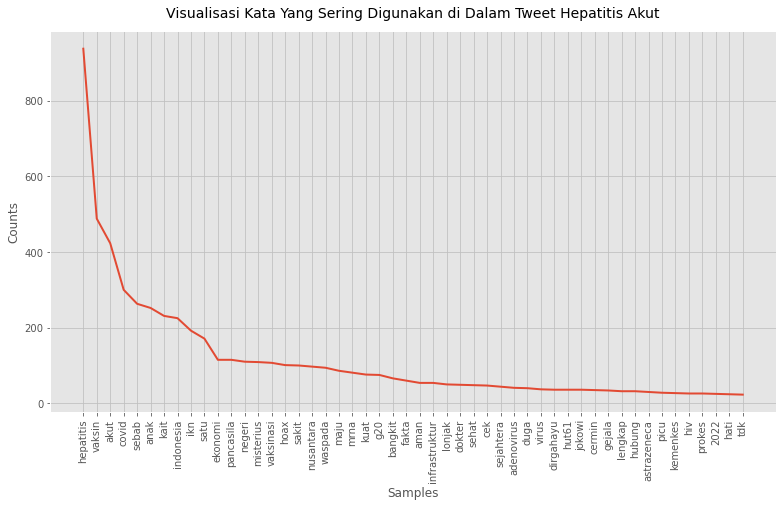

In [276]:
"""
Melihat total nilai dari kata per kata yang sering muncul berdasarkan
variabel fqdist_tweets menggunakan grafik garis (line plot) dan hanya menampilkan sebanyak 50 kata
"""
plt.figure(figsize=(13, 7))

plt.title("Visualisasi Kata Yang Sering Digunakan di Dalam Tweet Hepatitis Akut", fontsize=14, pad=14)
fqdist_tweets.plot(50, cumulative=False)
plt.show()

Berdasarkan grafik diatas menunjukkan kata-kata yang sering digunakan dalam meng-tweet terhadap topik hepatitis akut di media sosial twitter. Namun tidak semua kata ditampilkan didalam grafik melainkan hanya 50 kata yang sering digunakan untuk meng-tweet terhadap topik hepatitis akut.

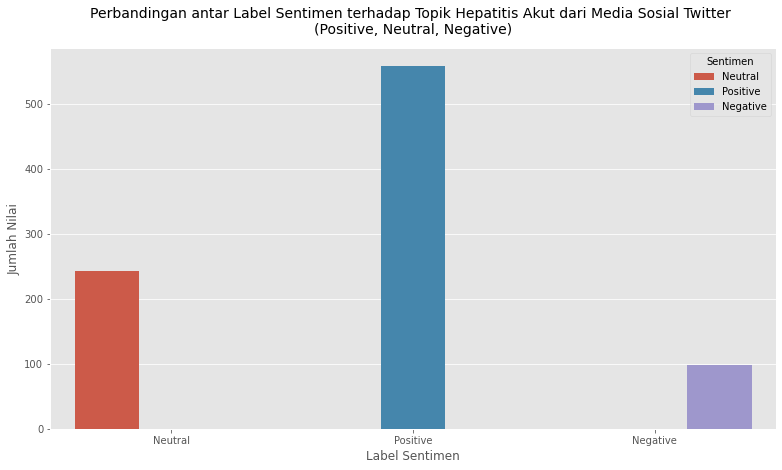

In [277]:
# Melihat perbandingan antar label sentimen yang ada di dalam DataFrame "data_hepatitis"
plt.figure(figsize=(13, 7))

sns.countplot(x="Sentimen", hue="Sentimen", data=data_hepatitis)
plt.title("Perbandingan antar Label Sentimen terhadap Topik Hepatitis Akut dari Media Sosial Twitter \n"
          "(Positive, Neutral, Negative)", fontsize=14, pad=14)
plt.xlabel("Label Sentimen")
plt.ylabel("Jumlah Nilai")
plt.show()

Berdasarkan grafik batang diatas dapat diketahui bahwa Label Sentimen yang mendominasi terhadap topik hepatitis akut adalah sentimen Positive sebayak 558 tweet. Contoh tweet yang memiliki label sentimen Positive adalah ketika ketua DPR memberikan respon terhadap hepatitis akut terhadap anak sehingga topik hepatitis akut terhadap anak mendapat perhatian khusus di masa sidang. Kemudian sentimen positive yang diberikan oleh warganet twitter adalah seperti warganet memberikan informasi kalau kegiatan vaksinasi booster tidak menyebabkan terjadinya penyakit hepatitis akut, dst. Mayoritas sentimen negatif diisi oleh tweet-tweet yang menyatakan informasi benar dan sesuai fakta, dukungan agar mau melakukan vaksin booster agar terhindar dari hepatitis akut, ucapan terima kasih, doa dan dukunga antar sesama warganet twitter, dll.

Label sentimen terbanyak kedua setelah Positive adalah Neutral (netral) yang berjumlah sebanyak 243 tweet. Contoh dari tweet netral yang diberikan oleh warganet twitter adalah "mulan hepatitis gunung", "adenovirus pada vaksin astrazeneca bukan penyebab hepatitis", dst. Mayoritas sentimen netral merupakan tweet-tweet yang tidak memiliki keterkaitan dengan hepatitis akut, dll.

Terakhir adalah label sentimen Negative yang memiliki jumlah tweet hanya 98 saja. Contoh tweet-tweet yang bernilai negatif terhadap topik hepatitis akut adalah "benarkah vaksin menyebabkan hepatitis. ini faktanya pancasila satukan negeri", "waspada hoax beredar unggahan yang menyatakan bahwa vaksin mrna menyebabkan hepatitis pada anak infrastruktur satukan nusantara", dst. Sentimen negatif rata-rata didominasi oleh tweet-tweet yang tidak benar (hoax), menimbulkan ketakutan warganet, dll.

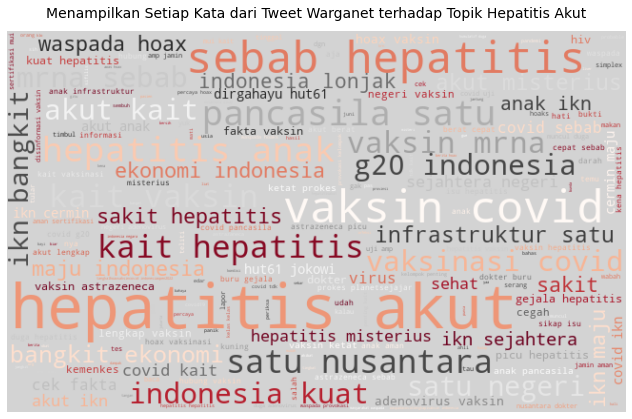

In [278]:
"""
Menampilkan sekaligus memvisualisasikan kata menggunakan grafik wordcloud
dari DataFrame "data_hepatitis" terhadap kolom "Tweet Bersih"
"""
plt.figure(figsize=(13, 7))

all_tweets = " ".join(word for word in data_hepatitis["Tweet Bersih"])
wordcloud = WordCloud(colormap="RdGy", width=650, height=400, 
                      mode="RGBA", background_color="lightgrey").generate(all_tweets)
plt.title("Menampilkan Setiap Kata dari Tweet Warganet terhadap Topik Hepatitis Akut", fontsize=14, pad=14)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Jika dilihat dari grafik diatas merupakan hasil dari wordcloud grafik yang bertujuan untuk mendapatkan insight pemahaman secara utuh tentang suatu ide atau gagasan dari seseorang atau tulisan seseorang dalam suatu waktu tertentu. Visualsasi ini banyak sekali digunakan dalam pengujian analisa sentimen karena untuk melihat setiap kata per kata yang di tweet oleh warganet twitter terhadap suatu topik permasalahan.

Namun hasil grafik diatas masih mencakup semua label sentimen (baik sentimen positif, netral, dan negatif) yang membuat saya kesulitan untuk mengetahui kata-kata mana yang bernilai sentimen publik yang positif, sentimen publik yang netral, dan sentimen publik yang negatif. Maka dari itu untuk memudahkan dalam membedakannya saya akan membuat grafik WordCloud kembali yang mencakup grafik WordCloud untuk sentimen positif, grafik WordCloud untuk sentimen netral, dan grafik WordCloud untuk sentimen negatif.

In [279]:
# Memisahkan semua tweet yang memiliki label sentimen positif berdasarkan dari kolom "Sentimen" dan menampilkan 7 data teratas
data_hepatitis_sentimen_positif = data_hepatitis[data_hepatitis.Sentimen == "Positive"]
data_hepatitis_sentimen_positif.head(7)

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding,Tweet Tokenizing,Tweet Stopwords,Tweet Normalisasi,Tweet Stemming,Tweet Bersih
1,2022-06-26 14:02:24,billion store,terbaik teraman supplement kesehatan kapsul sp...,Positive,terbaik teraman supplement kesehatan kapsul sp...,"[terbaik, teraman, supplement, kesehatan, kaps...","[terbaik, teraman, supplement, kesehatan, kaps...","[terbaik, teraman, supplement, kesehatan, kaps...","[baik, ram, supplement, sehat, kapsul, spiruli...",baik ram supplement sehat kapsul spirulina kol...
2,2022-06-26 12:19:45,lyndsay,ketua dpr puan maharani menyoroti sejumlah hal...,Positive,ketua dpr puan maharani menyoroti sejumlah hal...,"[ketua, dpr, puan, maharani, menyoroti, sejuml...","[ketua, dpr, puan, maharani, menyoroti, perhat...","[ketua, dpr, puan, maharani, menyoroti, perhat...","[ketua, dpr, puan, maharani, sorot, perhati, k...",ketua dpr puan maharani sorot perhati khusus d...
4,2022-06-26 12:17:25,lyndsay,puan menyoroti kasus hepatitis akut anak harga...,Positive,puan menyoroti kasus hepatitis akut anak harga...,"[puan, menyoroti, kasus, hepatitis, akut, anak...","[puan, menyoroti, hepatitis, akut, anak, harga...","[puan, menyoroti, hepatitis, akut, anak, harga...","[puan, sorot, hepatitis, akut, anak, harga, pa...",puan sorot hepatitis akut anak harga pangan le...
5,2022-06-26 11:20:51,syaza,ambil ujian darah doktor kata darah semua cant...,Positive,ambil ujian darah doktor kata darah semua cant...,"[ambil, ujian, darah, doktor, kata, darah, sem...","[ambil, ujian, darah, doktor, darah, cantik, c...","[ambil, ujian, darah, doktor, darah, cantik, k...","[ambil, uji, darah, doktor, darah, cantik, kol...",ambil uji darah doktor darah cantik kolesterol...
6,2022-06-26 11:17:15,jengkelin say,vaksin gak pernah salah jadi katakan saja itu ...,Positive,vaksin gak pernah salah jadi katakan saja itu ...,"[vaksin, gak, pernah, salah, jadi, katakan, sa...","[vaksin, gak, salah, misterius, rakyatmelawanm...","[vaksin, gak, salah, misterius, rakyatmelawanm...","[vaksin, gak, salah, misterius, rakyatmelawanm...",vaksin gak salah misterius rakyatmelawanmandat...
7,2022-06-26 11:08:07,pondok indah,sempat ramai beberapa waktu lalu hepatitis mis...,Positive,sempat ramai beberapa waktu lalu hepatitis mis...,"[sempat, ramai, beberapa, waktu, lalu, hepatit...","[ramai, hepatitis, misterius, penyebabnya, bia...","[ramai, hepatitis, misterius, penyebabnya, bia...","[ramai, hepatitis, misterius, sebab, biar, ped...",ramai hepatitis misterius sebab biar peduli ge...
12,2022-06-26 09:12:36,inisial,kalau perawatan kecantikan udah sering dibaha...,Positive,kalau perawatan kecantikan udah sering dibaha...,"[kalau, perawatan, kecantikan, udah, sering, d...","[perawatan, kecantikan, udah, dibahas, jarang,...","[perawatan, kecantikan, udah, dibahas, jarang,...","[awat, cantik, udah, bahas, jarang, bahas, awa...",awat cantik udah bahas jarang bahas awat sehat...


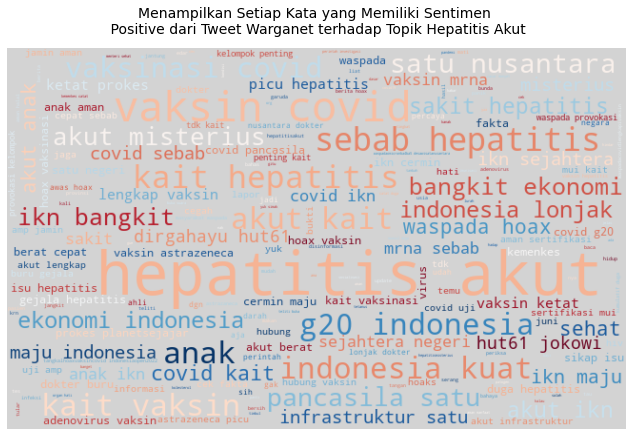

In [280]:
"""
Memvisualisasikan hasil tweet bersih terhadap sentimen positif menggunakan
grafik WordCloud terhadap variabel "data_hepatitis_sentimen_positif"
"""
plt.figure(figsize=(13, 7))

all_tweets_positive = " ".join(word for word in data_hepatitis_sentimen_positif["Tweet Bersih"])
wordcloud = WordCloud(colormap="RdBu", width=650, height=400, 
                      mode="RGBA", background_color="lightgrey").generate(all_tweets_positive)
plt.title("Menampilkan Setiap Kata yang Memiliki Sentimen \n Positive dari Tweet Warganet terhadap Topik Hepatitis Akut",
          fontsize=14, pad=14)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Kata-kata yang ada di dalam WordCloud diatas merupakan kata-kata yang berasal dari sentimen warganet twitter yang hanya bernilai positif sedangkan sentimen seperti netral maupun negatif tidak termasuk didalamnya karena grafik diatas memanggil variabel "data_hepatitis_sentimen_positif" yang otomatis di dalam variabel tersebut diisi oleh tweet-tweet yang memiliki label sentimen positif sedangkan sentimen netral maupun negatif tidak ada didalamnya. Hal tersebut dikarenakan masing-masing sentimen telah dipisahkan dan tentu saja grafik WordCloud-nya juga akan terpisah per masing-masing label sentimen.

In [281]:
# Memisahkan semua tweet yang memiliki label sentimen netral berdasarkan dari kolom "Sentimen"
data_hepatitis_sentimen_netral = data_hepatitis[data_hepatitis.Sentimen == "Neutral"]
data_hepatitis_sentimen_netral.tail()

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding,Tweet Tokenizing,Tweet Stopwords,Tweet Normalisasi,Tweet Stemming,Tweet Bersih
890,2022-06-17 02:19:20,askadi pijay,ikn sejahterakan negeri jangan percaya hoax va...,Neutral,ikn sejahterakan negeri jangan percaya hoax va...,"[ikn, sejahterakan, negeri, jangan, percaya, h...","[ikn, sejahterakan, negeri, percaya, hoax, vak...","[ikn, sejahterakan, negeri, percaya, hoax, vak...","[ikn, sejahtera, negeri, percaya, hoax, vaksin...",ikn sejahtera negeri percaya hoax vaksin covid...
891,2022-06-17 02:16:51,ujang frusciante,ikn sejahterakan negeri waspada informasi hoax...,Neutral,ikn sejahterakan negeri waspada informasi hoax...,"[ikn, sejahterakan, negeri, waspada, informasi...","[ikn, sejahterakan, negeri, waspada, informasi...","[ikn, sejahterakan, negeri, waspada, informasi...","[ikn, sejahtera, negeri, waspada, informasi, h...",ikn sejahtera negeri waspada informasi hoax ka...
892,2022-06-17 02:14:14,hermionne,ikn sejahterakan negeri waspada disinformasi d...,Neutral,ikn sejahterakan negeri waspada disinformasi d...,"[ikn, sejahterakan, negeri, waspada, disinform...","[ikn, sejahterakan, negeri, waspada, disinform...","[ikn, sejahterakan, negeri, waspada, disinform...","[ikn, sejahtera, negeri, waspada, disinformasi...",ikn sejahtera negeri waspada disinformasi hoax...
893,2022-06-17 02:12:54,anisa cenceni,disinformasi vaksin mrna menyebabkan hepatiti...,Neutral,disinformasi vaksin mrna menyebabkan hepatiti...,"[disinformasi, vaksin, mrna, menyebabkan, hepa...","[disinformasi, vaksin, mrna, menyebabkan, hepa...","[disinformasi, vaksin, mrna, menyebabkan, hepa...","[disinformasi, vaksin, mrna, sebab, hepatitis,...",disinformasi vaksin mrna sebab hepatitis padaa...
896,2022-06-17 02:03:05,dindu nuffin,kandungan adenovirus pada vaksin covid bukan p...,Neutral,kandungan adenovirus pada vaksin covid bukan p...,"[kandungan, adenovirus, pada, vaksin, covid, b...","[kandungan, adenovirus, vaksin, covid, penyeba...","[kandungan, adenovirus, vaksin, covid, penyeba...","[kandung, adenovirus, vaksin, covid, sebab, mu...",kandung adenovirus vaksin covid sebab muncul h...


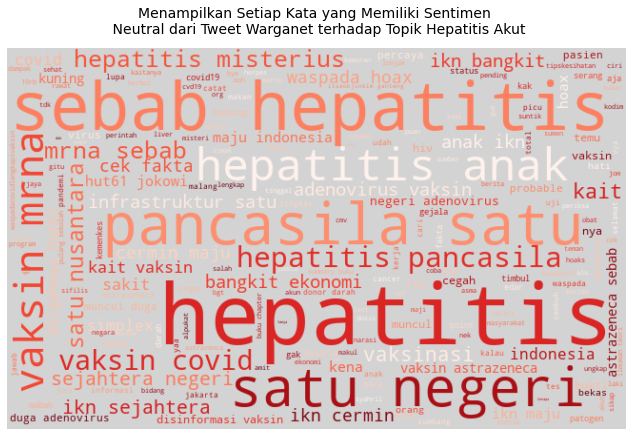

In [282]:
"""
Memvisualisasikan hasil tweet bersih terhadap sentimen netral menggunakan
grafik WordCloud terhadap variabel "data_hepatitis_sentimen_netral"
"""
plt.figure(figsize=(13, 7))

all_tweets_neutral = " ".join(word for word in data_hepatitis_sentimen_netral["Tweet Bersih"])
wordcloud = WordCloud(colormap="Reds", width=650, height=400, 
                      mode="RGBA", background_color="lightgrey").generate(all_tweets_neutral)
plt.title("Menampilkan Setiap Kata yang Memiliki Sentimen \n Neutral dari Tweet Warganet terhadap Topik Hepatitis Akut",
          fontsize=14, pad=14)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Kata-kata yang ada di dalam WordCloud diatas merupakan kata-kata yang berasal dari sentimen warganet twitter yang hanya bernilai netral sedangkan sentimen seperti positif maupun negatif tidak termasuk didalamnya karena grafik diatas memanggil variabel "data_hepatitis_sentimen_netral" yang otomatis di dalam variabel tersebut diisi oleh tweet-tweet yang memiliki label sentimen netral sedangkan sentimen positif maupun negatif tidak ada didalamnya. Hal tersebut dikarenakan masing-masing sentimen telah dipisahkan dan tentu saja grafik WordCloud-nya juga akan terpisah per masing-masing label sentimen.

In [283]:
# Memisahkan semua tweet yang memiliki label sentimen negatif berdasarkan dari kolom "Sentimen"
data_hepatitis_sentimen_negatif = data_hepatitis[data_hepatitis.Sentimen == "Negative"]
data_hepatitis_sentimen_negatif.head()

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding,Tweet Tokenizing,Tweet Stopwords,Tweet Normalisasi,Tweet Stemming,Tweet Bersih
10,2022-06-26 10:20:14,,gila dan itu mmg benar banyak anak2 sudah vak...,Negative,gila dan itu mmg benar banyak anak2 sudah vak...,"[gila, dan, itu, mmg, benar, banyak, anak2, su...","[gila, mmg, anak2, vaksin, kena, hepatitis, or...","[gila, memang, anak-anak, vaksin, kena, hepati...","[gila, memang, anak, vaksin, kena, hepatitis, ...",gila memang anak vaksin kena hepatitis orang t...
24,2022-06-26 05:15:47,jack kahuna laguna,normalisasi alkoholik negeri ini tidak akan pe...,Negative,normalisasi alkoholik negeri ini tidak akan pe...,"[normalisasi, alkoholik, negeri, ini, tidak, a...","[normalisasi, alkoholik, negeri, biarkan, kala...","[normalisasi, alkoholik, negeri, biarkan, kala...","[normalisasi, alkoholik, negeri, biar, kalang,...",normalisasi alkoholik negeri biar kalang orang...
29,2022-06-26 04:47:35,danilla hasan,salah vaksin mrna menyebabkan hepatitis pada ...,Negative,salah vaksin mrna menyebabkan hepatitis pada ...,"[salah, vaksin, mrna, menyebabkan, hepatitis, ...","[salah, vaksin, mrna, menyebabkan, hepatitis, ...","[salah, vaksin, mrna, menyebabkan, hepatitis, ...","[salah, vaksin, mrna, sebab, hepatitis, anak, ...",salah vaksin mrna sebab hepatitis anak pancasi...
30,2022-06-26 04:37:05,danceeatsleeprepeat,rumah sakit vaksin hepatitis nya sedang koson...,Negative,rumah sakit vaksin hepatitis nya sedang koson...,"[rumah, sakit, vaksin, hepatitis, nya, sedang,...","[rumah, sakit, vaksin, hepatitis, nya, kosong,...","[rumah, sakit, vaksin, hepatitis, nya, kosong,...","[rumah, sakit, vaksin, hepatitis, nya, kosong,...",rumah sakit vaksin hepatitis nya kosong kejar ...
41,2022-06-26 03:51:13,julfian mahardika,salah vaksin mrna menyebabkan hepatitis pada ...,Negative,salah vaksin mrna menyebabkan hepatitis pada ...,"[salah, vaksin, mrna, menyebabkan, hepatitis, ...","[salah, vaksin, mrna, menyebabkan, hepatitis, ...","[salah, vaksin, mrna, menyebabkan, hepatitis, ...","[salah, vaksin, mrna, sebab, hepatitis, anak, ...",salah vaksin mrna sebab hepatitis anak pancasi...


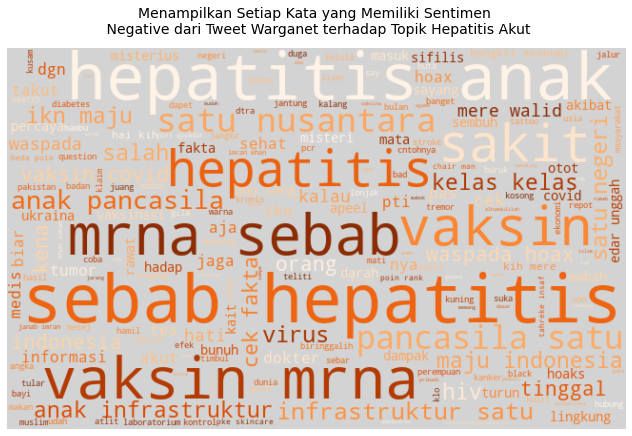

In [284]:
"""
Memvisualisasikan hasil tweet bersih terhadap sentimen negatif menggunakan
grafik WordCloud terhadap variabel "data_hepatitis_sentimen_negatif"
"""
plt.figure(figsize=(13, 7))

all_tweets_negative = " ".join(word for word in data_hepatitis_sentimen_negatif["Tweet Bersih"])
wordcloud = WordCloud(colormap="Oranges", width=650, height=400, 
                      mode="RGBA", background_color="lightgrey").generate(all_tweets_negative)
plt.title("Menampilkan Setiap Kata yang Memiliki Sentimen \n Negative dari Tweet Warganet terhadap Topik Hepatitis Akut",
          fontsize=14, pad=14)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Kata-kata yang ada di dalam WordCloud diatas merupakan kata-kata yang berasal dari sentimen warganet twitter yang hanya bernilai negatif sedangkan sentimen seperti positif maupun netral tidak termasuk didalamnya karena grafik diatas memanggil variabel "data_hepatitis_sentimen_negatif" yang otomatis di dalam variabel tersebut diisi oleh tweet-tweet yang memiliki label sentimen negatif saja sedangkan sentimen positif maupun netral tidak ada didalamnya. Hal tersebut dikarenakan masing-masing sentimen telah dipisahkan dan tentu saja grafik WordCloud-nya juga akan terpisah per masing-masing label sentimen.

## 5. Pemodelan dengan Algoritma Machine Learning (Naive Bayes & SVM)

### 5.1. Pra-Pemodelan

Sebelum melakukan tahap pemodelan dengan kedua algoritma machine learning (naive bayes dan support vector machine/svm), saya akan melakukan beberapa tahapan seperti melakukan pembobotan nilai terhadap kata per kata dari tweet yang sudah di preprocessing serta membagi data menjadi data training dan data testing dengan proporsi (persentase) yang akan ditentukan.

In [285]:
# Melihat kembali susunan DataFrame "data_hepatitis" dan menampilkan 3 data teratas
data_hepatitis.head(3)

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding,Tweet Tokenizing,Tweet Stopwords,Tweet Normalisasi,Tweet Stemming,Tweet Bersih
0,2022-06-26 16:16:08,base anak open,dok mau tanyaaa kalo misalnya tes hepatitis se...,Neutral,dok mau tanyaaa kalo misalnya tes hepatitis se...,"[dok, mau, tanyaaa, kalo, misalnya, tes, hepat...","[dok, tanyaaa, kalo, tes, hepatitis, sgot, sgp...","[dok, tanya, kalau, tes, hepatitis, sgot, sgpt...","[dok, tanya, kalau, tes, hepatitis, sgot, sgpt...",dok tanya kalau tes hepatitis sgot sgpt ningka...
1,2022-06-26 14:02:24,billion store,terbaik teraman supplement kesehatan kapsul sp...,Positive,terbaik teraman supplement kesehatan kapsul sp...,"[terbaik, teraman, supplement, kesehatan, kaps...","[terbaik, teraman, supplement, kesehatan, kaps...","[terbaik, teraman, supplement, kesehatan, kaps...","[baik, ram, supplement, sehat, kapsul, spiruli...",baik ram supplement sehat kapsul spirulina kol...
2,2022-06-26 12:19:45,lyndsay,ketua dpr puan maharani menyoroti sejumlah hal...,Positive,ketua dpr puan maharani menyoroti sejumlah hal...,"[ketua, dpr, puan, maharani, menyoroti, sejuml...","[ketua, dpr, puan, maharani, menyoroti, perhat...","[ketua, dpr, puan, maharani, menyoroti, perhat...","[ketua, dpr, puan, maharani, sorot, perhati, k...",ketua dpr puan maharani sorot perhati khusus d...


Setelah melihat kembali susunan DataFrame "data_hepatitis", tahap selanjutnya yaitu melakukan pembobotan nilai menggunakan sebuah metode yang bernama TF-IDF. TF-IDF merupakan metode yang memberikan bobot numerik kata per kata dalam mencerminkan betapa pentingnya kata tersebut dalam suatu topik permasalahan terlebih untuk pengujian natural language processing (nlp). Metode TF-IDF sangat sering digunakan untuk mencari informasi dari hasil text mining.

TF-IDF terdiri dari 2 kata yaitu TF (term frequency) dan IDF (inverse document frequency). Term Frequency (tf) merupakan sebuah perhitungan frekuensi kata di dalam teks dokumen seperti berapa kali kata tersebut muncul di dalam dokumen tersebut bukan memperhitungkan jumlah total kata di dalam dokumen tersebut. Inverse Document Frequency (idf) merupakan sebuah perhitungan bobot kata-kata langka atau kata yang jarang muncul/terlihat di dalam dokumen. Kata-kata yang jarang terlihat tersebut akan memiliki skor IDF tertinggi dibandingkan kata yang sering terlihat di dalam dokumen.

Referensi:

- https://analyticsindiamag.com/hands-on-implementation-of-tf-idf-from-scratch-in-python/

- https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/

In [286]:
# Melakukan proses pembobotan/pemberian nilai dengan TF-IDF berdasarkan kolom "Tweet Bersih" dari DataFrame "data_hepatitis"
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

# Memanggil library TfidfVectorizer untuk proses ekstraksi kata
tf_idf = TfidfVectorizer()

"""
Mengimplementasikan library TfidfVectorizer (telah ditampung di dalam variabel tf_idf) terhadap kolom "Tweet Bersih"
dari DataFrame "data_hepatitis" serta menampilkan hasil proses pembobotan teks dengan nilai numerik
"""
data_hepatitis_tf_idf = tf_idf.fit_transform(data_hepatitis["Tweet Bersih"])
print(data_hepatitis_tf_idf)

  (0, 827)	0.3791921029208135
  (0, 1185)	0.3791921029208135
  (0, 1551)	0.3575654588611385
  (0, 1550)	0.3575654588611385
  (0, 589)	0.05435499692644922
  (0, 1698)	0.2882644756971775
  (0, 764)	0.2882644756971775
  (0, 1658)	0.3791921029208135
  (0, 419)	0.3791921029208135
  (1, 1623)	0.2764071419067256
  (1, 593)	0.2606426815513443
  (1, 1214)	0.23369315857175757
  (1, 594)	0.2764071419067256
  (1, 784)	0.2764071419067256
  (1, 712)	0.22769978890246503
  (1, 389)	0.24945761892713889
  (1, 871)	0.24078181033619733
  (1, 1591)	0.2764071419067256
  (1, 783)	0.2764071419067256
  (1, 1517)	0.3179463880470528
  (1, 1624)	0.2764071419067256
  (1, 1412)	0.2764071419067256
  (1, 149)	0.2606426815513443
  (1, 589)	0.03962136667156848
  (2, 86)	0.09999921083858856
  :	:
  (897, 1381)	0.35351180395077136
  (897, 1518)	0.27727581180968525
  (897, 1843)	0.22542436990137055
  (897, 1158)	0.21462312125494554
  (897, 77)	0.26462397374609925
  (897, 757)	0.16497800072824517
  (897, 1810)	0.2178215210

Berdasarkan hasil output diatas hanya terlihat hasil pembobotan nilainya saja tanpa mengetahui kata apa yang diberikan bobot nilainya. Maka dari itu, saya akan mentransformasikan ke dalam bentuk kata per kata dengan bobot nilainya.

In [287]:
"""
Mentransformasikan hasil dari pembobotan nilai menjadi sebuah kata dengan nilai IDF.
Nilai IDF akan berfokus kepada kata yang jarang terlihat. Jadi semakin kata tersebut jarang terlihat dalam dokumen maka
kata tersebut akan memiliki frekuensi nilai yang tinggi. Sebaliknya jika kata tersebut sering terlihat dalam dokumen maka kata
tersebut akan memiliki frekuensi nilai yang rendah
"""
tf_idf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)
tf_idf_transformer.fit(data_hepatitis_tf_idf)

data_hepatitis_tfidf = pd.DataFrame(tf_idf_transformer.idf_, index=tf_idf.get_feature_names(),columns=["IDF_Values"])

data_hepatitis_tfidf.sort_values(by=["IDF_Values"])

,IDF_Values
hepatitis,1.019070
vaksin,1.738610
akut,1.781371
covid,2.142913
sebab,2.237874
...,...
jogja,7.109248
jln,7.109248
jiwa,7.109248
kab,7.109248


Berdasarkan hasil output diatas dapat diketahui bahwsanya kata hepatitis yang faktanya merupakan kata yang sering terlihat di dalam DataFrame "data_hepatitis" memiliki nilai IDF terendah (hanya 1.019070) dibandingkan kata jiwa yang memiliki nilai IDF sebesar 7.109248. Hal tersebut dikarenakan konsep IDF pada dasarnya merupakan pemberian nilai frekuensi terhadap kata-kata yang jarang terlihat atau kata yang langka di suatu dokumen (pada kasus pengujian ini adalah DataFrame "data_hepatitis"). Jadi karena kata jiwa jarang terlihat daripada kata hepatitis maka kata jiwa memiliki nilai IDF paling tinggi dibandingkan dengan kata hepatitis.

In [288]:
"""
Melakukan pembagian data menjadi 2 bagian (data training & data testing) menggunakan train_test_split.
Data training digunakan untuk melatih data sedangkan data testing digunakan untuk menguji
data terhadap model yang sudah dilatih
"""

x_train, x_test, y_train, y_test = train_test_split(data_hepatitis_tf_idf, data_hepatitis["Sentimen"],
                                                    test_size=0.3, random_state=31)

Berikut adalah penjelasan dari proses split validation:

1. data_hepatitis_tf_idf: Merupakan sebuah variabel yang terdiri dari tweet bersih setelah melakukan proses pembobotan nilai menggunakan data numerik.
2. data_hepatitis["Sentimen"]: Merupakan sebuah variabel yang berisi seluruh nilai label sentimen (positive, neutral dan negative).
3. test_size: Nilai presentase atau nilai proporsi dalam pembagian data menjadi data training dan data testing. Dalam pengujian ini saya memakai nilai presentase test_size sebesar 0.3 yang dimana ukuran dari data test mencapai 30% dan data train mencapai 70%.
4. random_state: Fungsi ini berfungsi untuk menetapkan nilai supaya ketika setiap kali codingan dijalankan maka nilai yang ada di data training dan data testing akan selalu tetap dan nilainya dan tidak berubah-ubah sedangkan jika di proses split validation ini tidak menetapkan nilai random_state maka setiap codingan dijalankan maka nilai baru akan teracak kembali di data training dan data testing sehingga akan memiliki nilai yang berbeda-beda setiap saat codingan dijalankan. Dalam menetapkan nilai random_state tidak ada ketentuan nilai yang pasti (bebas menentukan nilai bilangan bulat) namun dalam pengujian kali ini saya menetapkan nilai 31 di random_state.

Selain keempat penjelasan tersebut terdapat juga variabel-variabel baru seperti x_train, x_test, y_train, dan y_test. Berikut adalah penjelasannya:

1. x_train: Merupakan data training/data yang akan melatih menggunakan model machine learning. Variabel x_train terdiri dari variabel independen (variabel x) yang akan dilatih selama pemodelan berlangsung.
2. x_test: Merupakan data testing atau data yang akan mengetahui performa model yang telah dilatih dengan data training. Variabel x_test terdiri dari variabel independen (variabel x) yang akan diuji dengan data training.
3. y_train: Merupakan data training atau data yang akan melatih menggunakan model machine learning. Perbedaan dengan x_train yaitu variabel y_train terdiri dari variabel dependen (variabel y) yang akan dilatih selama proses pemodelan berlangsung.
4. y_test: Merupakan data testing atau data yang akan mengetahui performa model yang telah dilatih dengan data training. Sama seperti pada variabel y_train, variabel y_test sudah pasti berbeda dengan variabel x_test karena variabel ini, variabel y_test, terdiri dari variabel dependen (variabel y) yang akan diuji selama proses pemodelan berlangsung.

In [289]:
"""
Melihat ukuran (jumlah baris dan kolom) pada masing-masing data (data training & data testing)
dari 2 variabel yakni variabel independen dan variabel dependen setelah tahapan split validation
"""
print("Ukuran Data Training setelah Proses Split Validation: ", x_train.shape, y_train.shape)
print("Ukuran Data Testing setelah Proses Split Validation: ", x_test.shape, y_test.shape)

Ukuran Data Training setelah Proses Split Validation:  (629, 1883) (629,)
Ukuran Data Testing setelah Proses Split Validation:  (270, 1883) (270,)


### 5.2. Model Naive Bayes

In [290]:
"""
Melakukan pemodelan dengan algoritma multinomial naive bayes dan sekaligus melatih data 
dengan data training dan kemudian menampilkan parameter-parameter
beserta nilai terbaik per masing-masing parameter multinomial naive bayes. Proses pencarian nilai terbaik
untuk masing-masing parameter menggunakan library GridSearchCV
"""
from sklearn.naive_bayes import MultinomialNB

model_mnb = MultinomialNB()

"""
Menetapkan parameter dari model multinomial naive bayes (MultinomialNb) beserta nilai-nilai yang sesuai dengan tipe bawaan. 
Parameter-parameter untuk model multinnomial naive bayes dapat dilihat di website sklearn
"""
parameters_mnb = {
    "alpha": [6.5, 7.8, 3.4, 5.2],
    "fit_prior": [True, False]
    
}

"""
Memanggil paramater yang telah di deskripsikan dan memasukkannya ke dalam library yang berfungsi untuk 
mencari nilai terbaik dari masing-masing parameter yang telah dipanggil. Selain memasukkan parameter yang telah di 
deskripsikan
"""
grid_search_mnb = GridSearchCV(model_mnb, parameters_mnb)
grid_search_mnb.fit(x_train, y_train)

# Melihat nilai terbarik dari paramater alpha dan fit_prior yang dimiliki oleh dari algoritma MultinomialNB
print("Parameter Terbaik dari Parameter alpha adalah: ", grid_search_mnb.best_estimator_.get_params()["alpha"])
print("Parameter Terbaik dari Parameter fit_prior adalah: ", grid_search_mnb.best_estimator_.get_params()["fit_prior"])

Parameter Terbaik dari Parameter alpha adalah:  5.2
Parameter Terbaik dari Parameter fit_prior adalah:  False


Berdasarkan hasil output diatas terkait pencarian nilai terbaik dari masing-masing parameter di algoritma regresi multinomial naive bayes maka didapatkan beberapa kesimpulan diantaranya:

1. Pada parameter alpha, nilai terbaik yang dihasilkan adalah 5.2.
2. Terakhir adalah parameter fit_prior yang memiliki nilai terbaik yaitu False.

Pada proses tuning hyperparameters terhadap algoritma regresi decision tree, saya menggunakan sebuah fungsi yang bernama GridSearchCV. GridSearchCV merupakan sebuah teknik yang biasa dilakukan ketika sedang mencari atau memvalidasi sebuah nilai terbaik (the best value) dengan otomatis untuk setiap parameter-parameter dari algoritma machine learning dengan menggunakan data training sebagai data landasan untuk mencari nilai terbaik dari masing-masing parameter.

Berikut adalah beberapa referensi yang terkait:

- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

- https://www.mygreatlearning.com/blog/gridsearchcv/

- https://algotech.netlify.app/blog/gridsearchcv/#:~:text=GridSearchCV%20merupakan%20bagian%20dari%20modul,masing%20secara%20otomatis%20dan%20sistematis.

- https://medium.com/@adiptamartulandi/tuning-hyperparameters-logistic-regression-menggunakan-grid-search-ucupstory-fb1ab9db082a

In [291]:
# Melihat hasil prediksi terhadap label-label sentimen di data testing serta menampilkan hasil pengujiannya

print("----------------------------Nilai Prediksi dari Data Testing---------------------------------")
prediction_mnb = grid_search_mnb.predict(x_test)
print(prediction_mnb)

----------------------------Nilai Prediksi dari Data Testing---------------------------------
['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Neutral' 'Positive' 'Positive' 'Positive' 'Positive' 'Neutral'
 'Positive' 'Positive' 'Positive' 'Positive' 'Neutral' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Neutral'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Neutral' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Neutral' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Neutral' 'Positive'
 'Positive' 'Positive' 'Neutral' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive

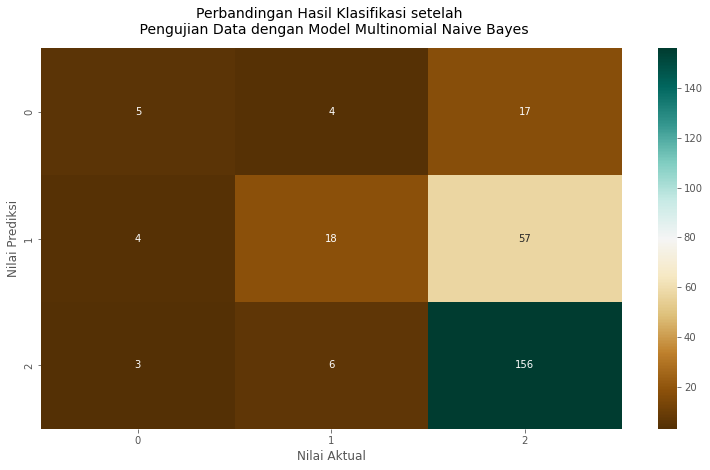

In [292]:
# Melihat hasil perbandingan dari model multinomial naive bayes terhadap klasifikasi antar label sentimen di data testing 
plt.figure(figsize=(13, 7))

sns.heatmap(confusion_matrix(y_test, prediction_mnb), annot=True, cmap="BrBG", fmt=".0f")
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Perbandingan Hasil Klasifikasi setelah \n Pengujian Data dengan Model Multinomial Naive Bayes", fontsize=14, pad=14)
plt.show()

In [293]:
# Menampilkan hasil akurasi pengujian berdasarkan data testing terhadap model Multinomial Naive Bayes

print("-------------------'Hasil Akhir Pengujian Menggunakan Model Multinomial Naive Bayes-------------------'")
print(classification_report(y_test, prediction_mnb))

-------------------'Hasil Akhir Pengujian Menggunakan Model Multinomial Naive Bayes-------------------'
              precision    recall  f1-score   support

    Negative       0.42      0.19      0.26        26
     Neutral       0.64      0.23      0.34        79
    Positive       0.68      0.95      0.79       165

    accuracy                           0.66       270
   macro avg       0.58      0.46      0.46       270
weighted avg       0.64      0.66      0.61       270



In [294]:
# Hanya melihat akurasi dari data testing terhadap algoritma support vector machine

print("Nilai Akurasi di Model Support Vector Machine:")
accuracy_mnb = accuracy_score(y_test, prediction_mnb)
print(accuracy_mnb)

Nilai Akurasi di Model Support Vector Machine:
0.662962962962963


### 5.3. Model SVM

In [295]:
"""
Melakukan pemodelan dengan algoritma support vector machine dan sekaligus melatih data 
dengan data training dan kemudian menampilkan parameter-parameter
beserta nilai terbaik per masing-masing parameter support vector machine. Proses pencarian nilai terbaik
untuk masing-masing parameter menggunakan library GridSearchCV
"""
from sklearn.svm import SVC

model_svm = SVC()

"""
Menetapkan parameter dari model support vector machine (svm) beserta nilai-nilai yang sesuai dengan tipe bawaan dari parameter. 
Parameter-parameter untuk model support vector machine dapat dilihat di website sklearn
"""
parameters_svm = {
    "C": [3.2, 2.1, 4.2, 1.2, 1.0, 5.5, 6.0, 6.3],
    "kernel": ["linear", "rbf", "sigmoid"],
    "degree": [2, 3, 5, 6, 4, 1, 8, 7]
    
}

"""
Memanggil paramater yang telah di deskripsikan dan memasukkannya ke dalam library yang berfungsi untuk 
mencari nilai terbaik dari masing-masing parameter yang telah dipanggil. Selain memasukkan parameter yang telah di 
deskripsikan
"""
grid_search_svm = GridSearchCV(model_svm, parameters_svm)
grid_search_svm.fit(x_train, y_train)

# Melihat nilai terbarik dari paramater C, kernel, dan degree yang dimiliki oleh dari algoritma support vector machine
print("Parameter Terbaik dari Parameter C adalah: ", grid_search_svm.best_estimator_.get_params()["C"])
print("Parameter Terbaik dari Parameter kernel adalah: ", grid_search_svm.best_estimator_.get_params()["kernel"])
print("Parameter Terbaik dari Parameter degree adalah: ", grid_search_svm.best_estimator_.get_params()["degree"])

Parameter Terbaik dari Parameter C adalah:  1.2
Parameter Terbaik dari Parameter kernel adalah:  linear
Parameter Terbaik dari Parameter degree adalah:  2


Berdasarkan hasil output diatas terkait pencarian nilai terbaik dari masing-masing parameter di algoritma regresi support vector machine maka didapatkan beberapa kesimpulan diantaranya:

1. Pada parameter C, nilai terbaik yang dihasilkan adalah 1.2.
2. Parameter kernel parameter yang terbaik yaitu linear 
2. Terakhir adalah parameter degree yang memiliki nilai terbaik yaitu 2.

Pada proses tuning hyperparameters terhadap algoritma regresi decision tree, saya menggunakan sebuah fungsi yang bernama GridSearchCV. GridSearchCV merupakan sebuah teknik yang biasa dilakukan ketika sedang mencari atau memvalidasi sebuah nilai terbaik (the best value) dengan otomatis untuk setiap parameter-parameter dari algoritma machine learning dengan menggunakan data training sebagai data landasan untuk mencari nilai terbaik dari masing-masing parameter.

Berikut adalah beberapa referensi yang terkait:

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

- https://www.mygreatlearning.com/blog/gridsearchcv/

- https://algotech.netlify.app/blog/gridsearchcv/#:~:text=GridSearchCV%20merupakan%20bagian%20dari%20modul,masing%20secara%20otomatis%20dan%20sistematis.

- https://medium.com/@adiptamartulandi/tuning-hyperparameters-logistic-regression-menggunakan-grid-search-ucupstory-fb1ab9db082a

In [296]:
# Melihat hasil prediksi terhadap label-label sentimen di data testing serta menampilkan hasil pengujiannya

print("----------------------------Nilai Prediksi dari Data Testing---------------------------------")
prediction_svm = grid_search_svm.predict(x_test)
print(prediction_svm)

----------------------------Nilai Prediksi dari Data Testing---------------------------------
['Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Neutral' 'Positive' 'Positive' 'Positive' 'Positive' 'Neutral'
 'Positive' 'Positive' 'Neutral' 'Positive' 'Neutral' 'Positive' 'Neutral'
 'Positive' 'Positive' 'Positive' 'Positive' 'Neutral' 'Positive'
 'Positive' 'Positive' 'Positive' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Positive' 'Positive' 'Neutral' 'Positive' 'Neutral' 'Positive'
 'Positive' 'Positive' 'Neutral' 'Positive' 'Positive' 'Positive'
 'Neutral' 'Neutral' 'Negative' 'Positive' 'Positive' 'Positive'
 'Positive' 'Neutral' 'Positive' 'Positive' 'Positive' 'Neutral' 'Neutral'
 'Neutral' 'Positive' 'Negative' 'Neutral' 'Positive' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Neutral'
 'Neutral' 'Positive' 'Positive' 'Positive' 'Neutral' 'Positive'
 'Positive' 'Positive' 'Positive' 'Neutral' 'Neutral' 'Neutral' 'Negative'
 'Neutr

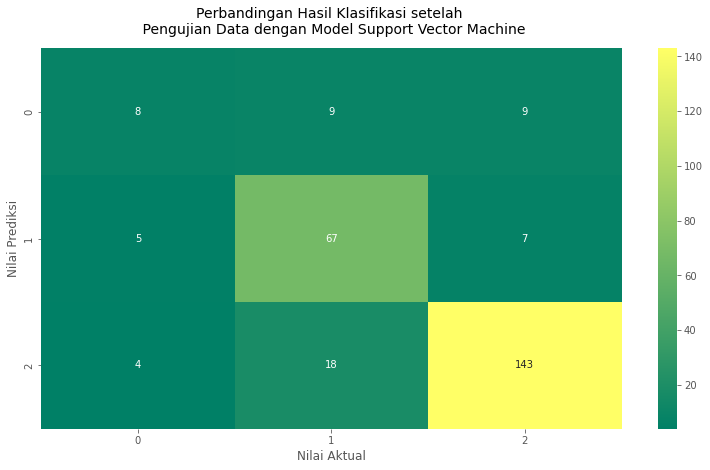

In [297]:
# Melihat hasil perbandingan dari model support vector machine terhadap klasifikasi antar label sentimen di data testing
plt.figure(figsize=(13, 7))

sns.heatmap(confusion_matrix(y_test, prediction_svm), annot=True, cmap="summer", fmt=".0f")
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Perbandingan Hasil Klasifikasi setelah \n Pengujian Data dengan Model Support Vector Machine", fontsize=14, pad=14)
plt.show()

In [298]:
# Hanya melihat akurasi dari data testing terhadap model support vector machine

print("Nilai Akurasi di Model Support Vector Machine:")
accuracy_svm = accuracy_score(y_test, prediction_svm)
print(accuracy_svm)

Nilai Akurasi di Model Support Vector Machine:
0.8074074074074075


In [299]:
# Menampilkan hasil akurasi pengujian berdasarkan data testing terhadap model support vector machine

print("-------------------'Hasil Akhir Pengujian Menggunakan Model Suport Vector Machine-------------------'")
print(classification_report(y_test, prediction_svm))

-------------------'Hasil Akhir Pengujian Menggunakan Model Suport Vector Machine-------------------'
              precision    recall  f1-score   support

    Negative       0.47      0.31      0.37        26
     Neutral       0.71      0.85      0.77        79
    Positive       0.90      0.87      0.88       165

    accuracy                           0.81       270
   macro avg       0.69      0.67      0.68       270
weighted avg       0.80      0.81      0.80       270



### 5.4. Membuat Grafik Akurasi dari Kedua Algoritma (Naive Bayes & SVM)

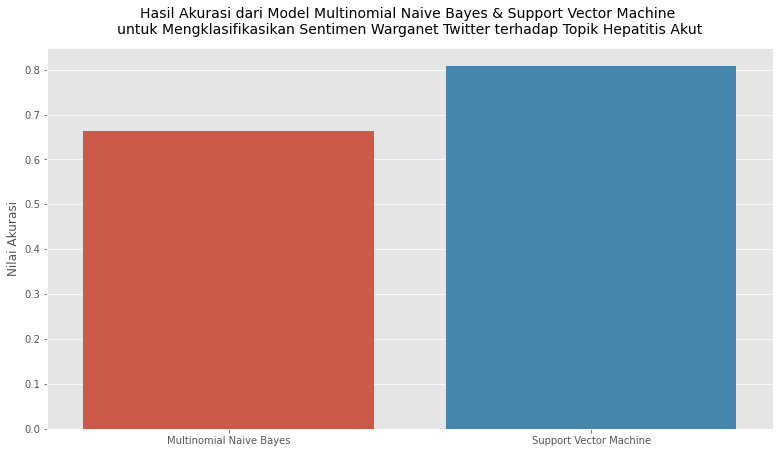

In [300]:
# Grafik untuk memperlihatkan nilai akurasi dari model multinomial naive bayes dan support vector machine
plt.figure(figsize=(13, 7))

models = ("Multinomial Naive Bayes", "Support Vector Machine")
x_pos = np.arange(len(models))
accuracy = [accuracy_mnb, accuracy_svm]
    
sns.barplot(x=x_pos, y=accuracy)
plt.xticks(x_pos, models)
plt.title("Hasil Akurasi dari Model Multinomial Naive Bayes & Support Vector Machine \n"
          "untuk Mengklasifikasikan Sentimen Warganet Twitter terhadap Topik Hepatitis Akut", 
          fontsize=14, pad=14)
plt.ylabel("Nilai Akurasi")
plt.show()

Berdasarkan grafik batang diatas, saya dapat mengetahui dan mengambil kesimpulan diantaranya adalah sebagai berikut:

1. Nilai akurasi multinomial naive bayes sebesar 0.66. Menurut saya akurasi tersebut tidak cukup tinggi dalam memprediksi atau mengklasifikasikan sentimen warganet twitter terhadap topik hepatitis akut. Maka dari itu model multinomial naive bayes tidak disarankan untuk digunakan kembali dalam mengklasifikasikan sentimen warganet twitter terhadap topik hepatitis akut karena hasil klasifikasinya belum cukup optimal.
2. Nilai akurasi yang dihasilkan oleh model support vector machine sebesar 0.81 yang menjadikan model ini memiliki hasil klasifikasi/prediksi yang paling tepat dan optimal jika digunakan untuk mengklasifikasikan sentimen warganet twitter jika dibandingkan dengan model multinomial naive bayes.